In [105]:
%%time

import pandas as pd
import numpy as np

# Random seed for reproducibility
SEED = 123
# A file to save global variables
global_variables = pd.DataFrame({'SEED': [SEED]})
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

train_unprocessed = pd.read_csv('datasets/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test_unprocessed = pd.read_csv('datasets/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')



train_unprocessed.head()

CPU times: total: 938 ms
Wall time: 1.01 s


latitude  longitude  year  week_no  \
ID_LAT_LON_YEAR_WEEK                                           
ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

                          SulphurDioxide_SO2_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                 
ID_-0.510_29.290_2019_00                                 -0.000108   
ID_-0.510_29.290_2019_01                                  0.000021   
ID_-0.510_29.290_2019_02                                  0.000514   
ID_-0.510_29.290_2019_03                                       NaN   
ID_-0.510_29.290_2019_04                                 -0.000079   

                          SulphurDioxide_SO2_column_number_density_amf  \
ID_LAT_LON_YEAR_WEEK                                                     
ID_-0.510_29.290_2019_00                                      0.603019   
ID_-0.510_29.290_2019_01                                      0.728214   
ID_-0.510_29.290_2019_02                                      0.748199   
ID_-0.510_29.290_2019_03                                           NaN   
ID_-0.510_29.290_2019_04                                      0.676296   

                          SulphurDioxide_SO2_slant_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                       
ID_-0.510_29.290_2019_00                                       -0.000065   
ID_-0.510_29.290_2019_01                                        0.000014   
ID_-0.510_29.290_2019_02                                        0.000385   
ID_-0.510_29.290_2019_03                                             NaN   
ID_-0.510_29.290_2019_04                                       -0.000048   

                          SulphurDioxide_cloud_fraction  \
ID_LAT_LON_YEAR_WEEK                                      
ID_-0.510_29.290_2019_00                       0.255668   
ID_-0.510_29.290_2019_01                       0.130988   
ID_-0.510_29.290_2019_02                       0.110018   
ID_-0.510_29.290_2019_03                            NaN   
ID_-0.510_29.290_2019_04                       0.121164   

                          SulphurDioxide_sensor_azimuth_angle  \
ID_LAT_LON_YEAR_WEEK                                            
ID_-0.510_29.290_2019_00                           -98.593887   
ID_-0.510_29.290_2019_01                            16.592861   
ID_-0.510_29.290_2019_02                            72.795837   
ID_-0.510_29.290_2019_03                                  NaN   
ID_-0.510_29.290_2019_04                             4.121269   

                          SulphurDioxide_sensor_zenith_angle  ...  \
ID_LAT_LON_YEAR_WEEK                                          ...   
ID_-0.510_29.290_2019_00                           50.843559  ...   
ID_-0.510_29.290_2019_01                           39.137194  ...   
ID_-0.510_29.290_2019_02                           52.868816  ...   
ID_-0.510_29.290_2019_03                                 NaN  ...   
ID_-0.510_29.290_2019_04                           35.515587  ...   

                          Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
ID_LAT_LON_YEAR_WEEK                                                          
ID_-0.510_29.290_2019_00             3664.436218               61085.809570   
ID_-0.510_29.290_2019_01             3651.190311               66969.478735   
ID_-0.510_29.290_2019_02             4216.986492               60068.894448   
ID_-0.510_29.290_2019_03             5228.507736               51064.547339   
ID_-0.510_29.290_2019_04             3980.598120               63751.125781   

                          Cloud_cloud_base_height  Cloud_cloud_optical_depth  \
ID_LAT_LON_YEAR_WEEK                          

In [106]:
train_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

## 00. Baseline

First, we'll make a baseline prediction, that all emissions are equal to the median emission of the training set. We'll calculate the RMSE of this prediction on the training set (for future cases, we'll calculate separately Train RMSE and Cross-validation RMSE).

We'll save our intermediate results in DataFrame scores_df:

In [107]:
from sklearn.metrics import mean_squared_error

train_predictions_00 = pd.DataFrame([train_unprocessed['emission'].median()] * len(train_unprocessed), columns=['emission'])

scores_df = pd.DataFrame({'Comment': [], 'Train RMSE': [], 'Cross-val RMSE': [], 'Test RMSE': []})

score_00 = mean_squared_error(train_unprocessed['emission'], train_predictions_00['emission'], squared=False) - 0

scores_df.loc[0, 'Comment'] = 'Just median'
scores_df.loc[0, 'Train RMSE'] = score_00
scores_df.loc[0, 'Cross-val RMSE'] = np.nan
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0  Just median  148.806038             NaN        NaN

Now, we'll make a submission to Kaggle to see our Test RMSE. We won't use Test RMSE in making decisions, since we don't want to overfit to the visible testing data (unvisible part of the testing data will be used in calculating the final competition score) but we'll use Test RMSE to catch bugs in our Score calculations:

In [108]:
test_predictions_00 = pd.DataFrame([train_predictions_00['emission'].median()] * len(test_unprocessed), columns=['emission'])
submission_00 = pd.concat([pd.DataFrame(test_unprocessed.index, columns=['ID_LAT_LON_YEAR_WEEK']), test_predictions_00], axis=1)

submission_00.to_csv('submissions/submission_00.csv', index=False)

scores_df.loc[0, 'Test RMSE'] = 169.19374
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0  Just median  148.806038             NaN  169.19374

## Choosing number of cross-validation splits

We'll use LightGBM as our first estimator. It is fast, efficient, doesn't require normalization and can handle missing values.

For calculating Score, I wrote get_score function, that is located in ['functions/get_score.py'](functions/get_score.py). This function uses TimeSeriesSplit for cross-validation. 

We want such number of cross-validation splits that give us the best balance between bias and variance. For the sake of run time, the optimal number of splits calculation is done in a separate file: ['functions/n_splits.py'](functions/n_splits.py). We'll calculate scores among several different random states (all depend on the SEED, chosen at the beginning of this file).

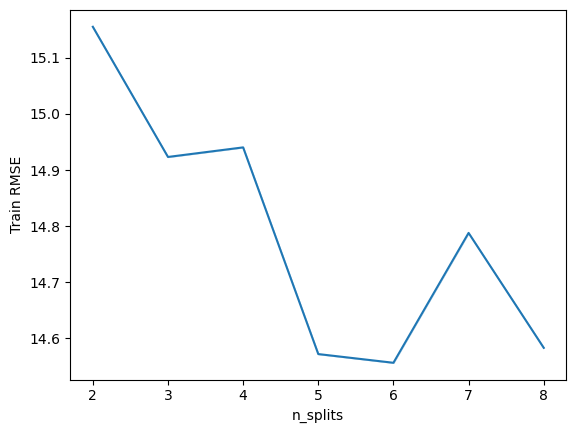

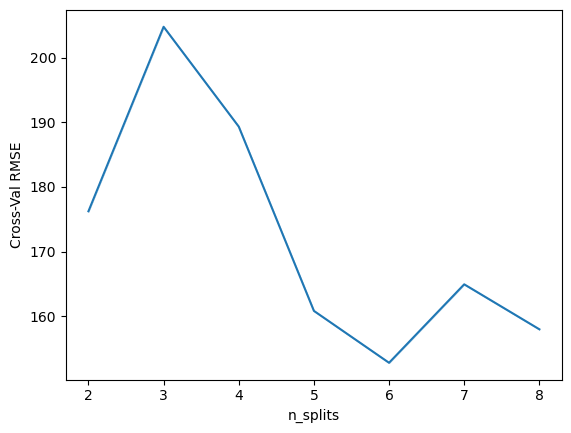

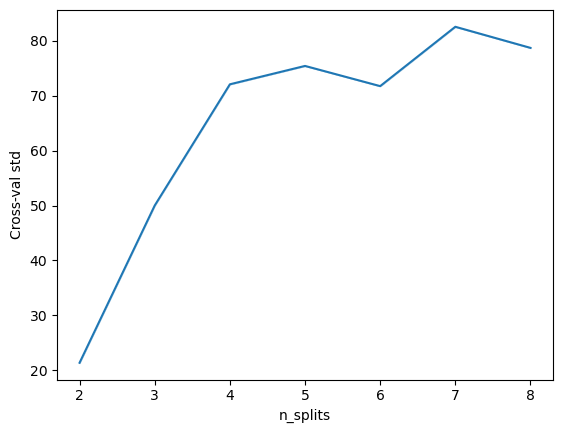

In [109]:
tradeoff = pd.read_csv('functions/tradeoff.csv', index_col=0)

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=tradeoff, x='n_splits', y='Train RMSE')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-Val RMSE')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-val std')
plt.show()


We'll use 6 splits, for a good balance between bias, variance and execution time:

In [110]:
N_SPLITS = 6
global_variables['N_SPLITS'] = N_SPLITS
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

## 01. LightGBM on unprocessed data

Let's find Scores and Test RMSE for this number of splits:

In [111]:
%%time

# UNCOMMENT TO INSTALL LightGBM
#!pip install lightgbm
import lightgbm as lgb

study_number = '01'

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1)

# Calculate scores
from functions.get_score import get_score

train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                   train_unprocessed,
                                                                   test_unprocessed,
                                                                   model, scores_df,
                                                        comment="LightGBM on unprocessed data")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 54.2 s
Wall time: 5.77 s


In [112]:
scores_df.loc[int(study_number), 'Test RMSE'] = 47.78191
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191

## Date and WeekCount

Let's create time features, a date and a week count:

In [113]:
train = train_unprocessed.copy(deep=True)
test = test_unprocessed.copy(deep=True)

# Create a 'date' feature
train['date'] = pd.to_datetime(train_unprocessed.year.astype(str), format='%Y') + \
                     pd.to_timedelta(train_unprocessed.week_no.mul(7).astype(str) + ' days')
test['date'] = pd.to_datetime(test_unprocessed.year.astype(str), format='%Y') + \
                     pd.to_timedelta(test_unprocessed.week_no.mul(7).astype(str) + ' days')

# Create WeekCount feature
feature_name = 'WeekCount'
for data in [train, test]:
    
    data[feature_name] = (data['year'] - 2019) * 53 + data['week_no']
    
    print(data[feature_name].info())
    print(data[feature_name].describe())



<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
79023 non-null  int64
dtypes: int64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        79.000000
std         45.898729
min          0.000000
25%         39.000000
50%         79.000000
75%        119.000000
max        158.000000
Name: WeekCount, dtype: float64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
24353 non-null  int64
dtypes: int64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean       183.000000
std         14.142426
min        159.000000
25%        171.000000
50%        183.000000
75%        195.000000
max        207.000000
Name: WeekCount, dtype: float64


## Location Types

Note, latitude and longitude do not fully make sence as numerical features. Instead, we shall create a categorical feature Location, which will be a combination of latitude and longitude:

In [114]:
feature_name = 'Location'

# Create a new feature
for data in [train, test]:
    data[feature_name] = data['latitude'].astype('string') + data['longitude'].astype('string')
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  string
dtypes: string(1)
memory usage: 3.2+ MB
None
count          79023
unique           497
top       -0.5129.29
freq             159
Name: Location, dtype: object
Unique Values and their count:
-0.5129.29      159
-0.72629.374    159
-0.54729.653    159
-0.56930.031    159
-0.59829.102    159
               ... 
-3.15330.347    159
-3.16128.839    159
-3.17429.926    159
-3.28729.713    159
-3.29930.301    159
Name: Location, Length: 497, dtype: Int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  string
dtypes: string(1)
memory usage: 380.5+ KB
None
count          24353
unique           497
top       -0.5129.29
freq              49
Name: Locatio

Alright, we have 497 unique locations. Let's try to identify groups of locations with similar 'emission' patterns:

In [115]:
## Create a pivot table

location_table = pd.pivot_table(train, index='date', columns='Location', values='emission')

location_table.head()

Location    -0.5129.29    -0.52829.472  -0.54729.653  -0.56930.031  \
date                                                                 
2019-01-01      3.750994      3.857115      0.500023    100.382980   
2019-01-08      4.025176      4.213432      0.529315    106.375980   
2019-01-15      4.231381      4.451489      0.554183    110.766335   
2019-01-22      4.305286      4.553981      0.561553    113.097940   
2019-01-29      4.347317      4.676066      0.559731    114.985886   

Location    -0.59829.102  -0.60429.896  -0.61530.885  -0.62729.773  \
date                                                                 
2019-01-01      0.076542      64.49460     76.600110    101.643295   
2019-01-08      0.081001      68.42294     82.630714    109.828674   
2019-01-15      0.084788      71.01155     86.668290    115.189064   
2019-01-22      0.085920      72.57178     88.741880    117.846870   
2019-01-29      0.085650      73.83461     91.137010    120.702270   

Location    -0.63730.763  -0.65330.447  ...  -3.09529.505  -3.09929.601  \
date                                    ...                               
2019-01-01     40.153328     28.108765  ...      5.375411      69.82686   
2019-01-08     41.531597     29.032100  ...      5.420106      74.35756   
2019-01-15     42.774483     29.870031  ...      5.327792      77.72222   
2019-01-22     43.542730     30.415354  ...      5.422680      79.23992   
2019-01-29     43.739470     30.567698  ...      5.316918      80.32427   

Location    -3.13329.467  -3.13630.364  -3.13830.662  -3.15330.347  \
date                                                                 
2019-01-01    105.982190     14.774838     23.184301     15.069341   
2019-01-08    113.068474     15.337234     24.404161     16.217907   
2019-01-15    118.279810     15.730142     25.097378     16.811665   
2019-01-22    120.618580     15.979696     25.591475     17.231894   
2019-01-29    122.382960     15.905249     25.756530     17.642060   

Location    -3.16128.839  -3.17429.926  -3.28729.713  -3.29930.301  
date                                                                
2019-01-01      0.106631     41.193130     39.696404     26.111166  
2019-01-08      0.112878     43.877285     43.529408     28.045977  
2019-01-15      0.118181     45.760826     45.993286     29.293518  
2019-01-22      0.119753     46.675327     47.163128     29.950650  
2019-01-29      0.119364     47.317184     48.742470     30.572742  

[5 rows x 497 columns]

We'll create an elbow plot of explained variance by number of principal components:

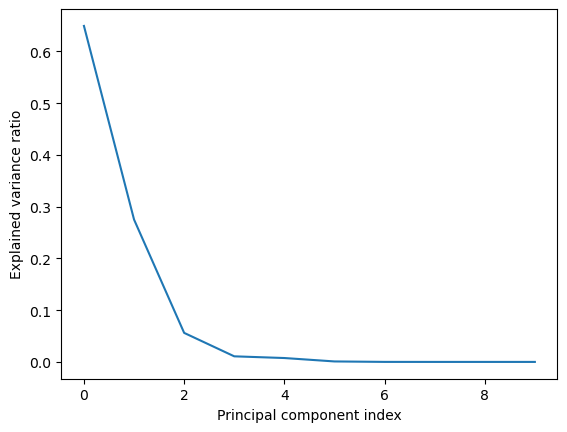

CPU times: total: 234 ms
Wall time: 151 ms


In [116]:
%%time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

# Fit PCA
pca.fit(location_table)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

2 components explain most of the variance. Let's find the special locations:

In [117]:
%%time

# Recalculate PCA 
pca = PCA(n_components = 2)
pca.fit(location_table)

# Create importance dataframes
location_importances = pd.DataFrame(np.transpose(abs(pca.components_)), index = location_table.columns, columns=['PC1', "PC2"])


print('Locations sorted by PC1 imortance:')
location_importances.sort_values(by='PC1', ascending=False).head(10)

Locations sorted by PC1 imortance:
CPU times: total: 0 ns
Wall time: 12 ms


PC1       PC2
Location                        
-2.07929.321  0.991361  0.088617
-2.37829.222  0.050352  0.164703
-1.34631.254  0.024180  0.048800
-1.51429.686  0.020555  0.189729
-1.31930.281  0.019428  0.149098
-2.33529.665  0.019208  0.137005
-2.15429.946  0.018832  0.142713
-0.95630.744  0.017227  0.044920
-1.88230.018  0.017226  0.120596
-1.18731.113  0.016235  0.033655

In [118]:
print('Locations sorted by PC2 imortance:')
location_importances.sort_values(by='PC2', ascending=False).head(10)

Locations sorted by PC2 imortance:


PC1       PC2
Location                        
-1.51429.686  0.020555  0.189729
-2.59929.801  0.009692  0.184982
-2.37829.222  0.050352  0.164703
-1.48629.614  0.011875  0.160348
-2.29329.507  0.013203  0.160082
-2.37629.924  0.005365  0.150127
-1.31930.281  0.019428  0.149098
-2.15429.946  0.018832  0.142713
-2.33529.665  0.019208  0.137005
-1.94529.155  0.015958  0.130591

In [119]:
special_locations = location_importances.sort_values(by='PC1', ascending=False).index[:2].tolist()
    
special_locations

['-2.07929.321', '-2.37829.222']

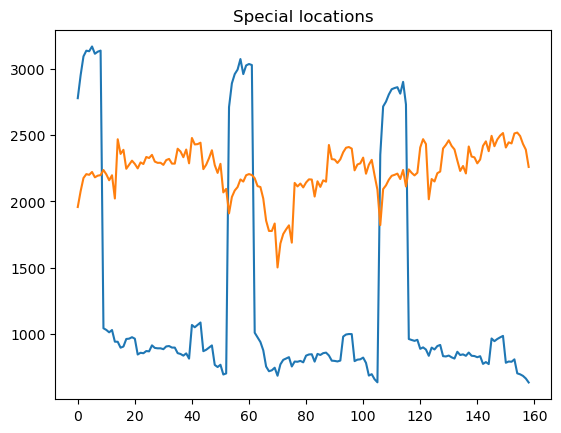

CPU times: total: 297 ms
Wall time: 150 ms


In [120]:
%%time


for location in special_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)
plt.title('Special locations')
plt.show()

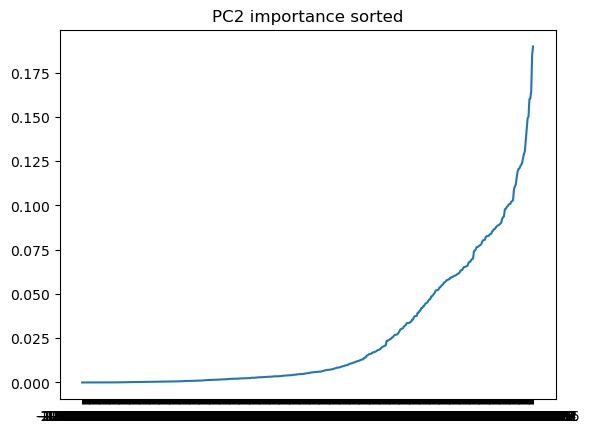

In [121]:
plt.plot(location_importances['PC2'].sort_values(ascending=True))
plt.title('PC2 importance sorted')
plt.show()

Playing with border_importane parameter we can separate the rest of locations in two distinct groups with common patterns:

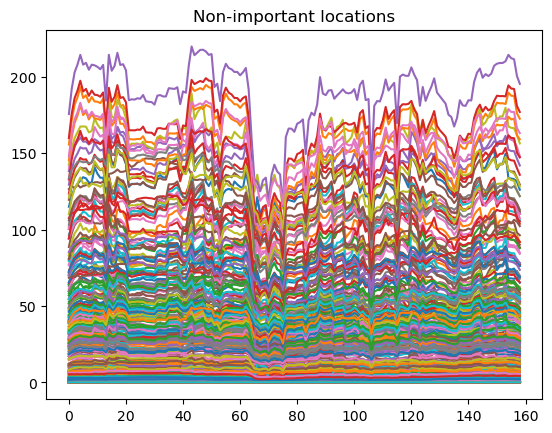

CPU times: total: 344 ms
Wall time: 399 ms


In [122]:
%%time

border_importance = location_importances['PC2'].quantile(0.65)

non_important_locations = location_importances.loc[location_importances['PC2'] < border_importance].index.to_list()
important_locations = location_importances.loc[location_importances['PC2'] >= border_importance].index.to_list()
important_locations = list(set(important_locations) - set(special_locations))
assert(len(non_important_locations) + len(important_locations) + len(special_locations) == len(location_table.columns))

for location in non_important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)  

plt.title('Non-important locations')
plt.show()

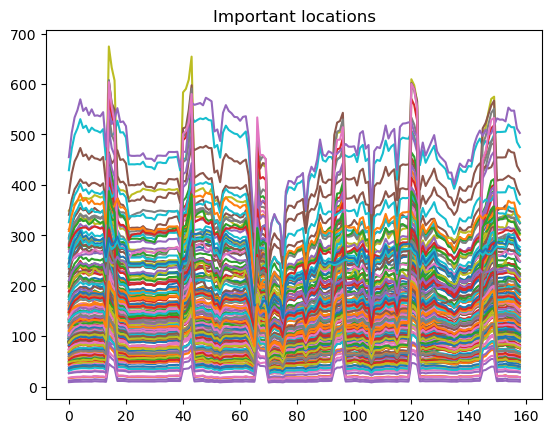

CPU times: total: 266 ms
Wall time: 308 ms


In [123]:
%%time

for location in important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)    
plt.title('Important locations')
plt.show()

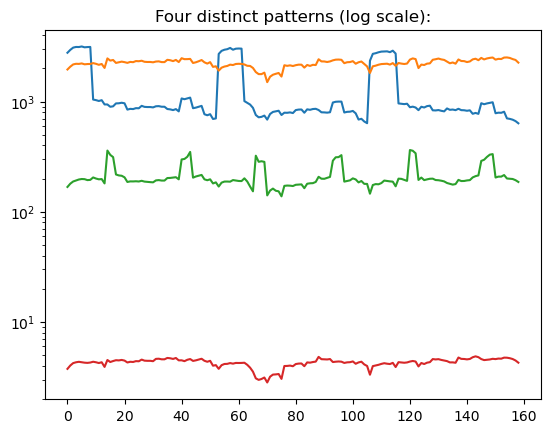

In [124]:
four_representatives = special_locations.copy()
four_representatives.append(important_locations[0])
four_representatives.append(non_important_locations[0])

fig, ax = plt.subplots()
for location in four_representatives:
    series = location_table[location]
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns (log scale):')
ax.set_yscale('log')
plt.show()

One of the special locations has a pattern similar to the patterns for the low emissions locations, but, since it has high emission, I will still explore it separately.

In [125]:
%%time

feature_name = 'Location_group'

location_importances[feature_name] = ['High' if location in important_locations else \
                           'Low' if location in non_important_locations else \
                          "Special 1" if location == special_locations[0] else \
                          "Special 2" if location == special_locations[1] else \
                          "ERROR" for location in location_importances.index]

for data in [train, test]:
    
    data[feature_name] = data["Location"].map(location_importances[feature_name])
    
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())


<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB
None
count     79023
unique        4
top         Low
freq      51357
Name: Location_group, dtype: object
Unique Values and their count:
Low          51357
High         27348
Special 1      159
Special 2      159
Name: Location_group, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  object
dtypes: object(1)
memory usage: 380.5+ KB
None
count     24353
unique        4
top         Low
freq      15827
Name: Location_group, dtype: object
Unique Values and their count:
Low          15827
High          8428
Special 1       49
Special 2       49
Name: Location_group, dtype: int64
CPU time

## 02. Remove COVID period

As AmbrosM described, the emissions were affected by one-time event: the COVID pandemic.

My approach here will be to exclude the COVID drop period from the dataset.


First, let's find the dates of COVID pattern in the Low group:

<timed exec>:9: UserWarning: FixedFormatter should only be used together with FixedLocator


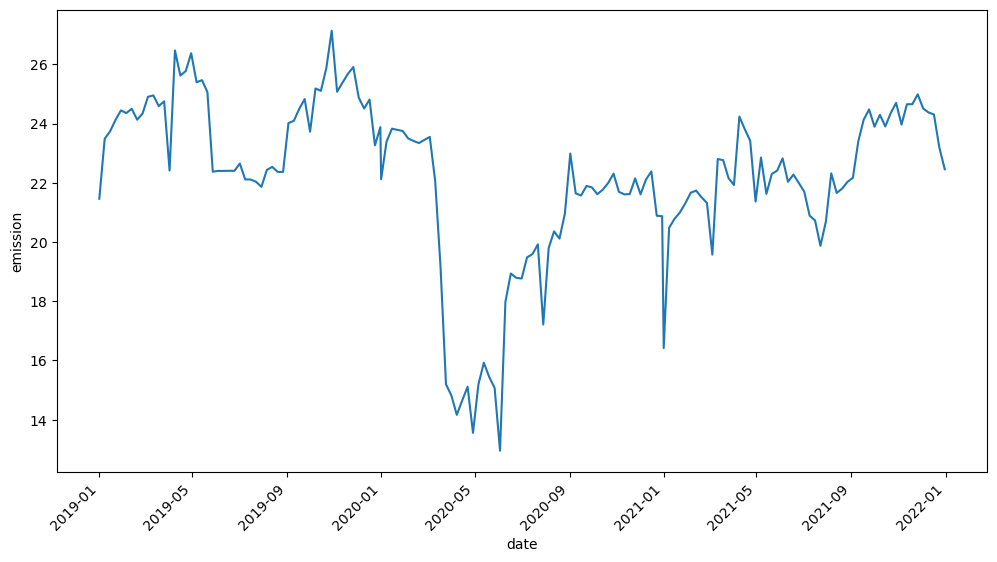

CPU times: total: 297 ms
Wall time: 307 ms


In [126]:
%%time

study_number = '02'

train_and_test = pd.concat([train, test])
train_and_test_low = train_and_test.loc[train_and_test["Location_group"] == 'Low']
train_and_test_low_by_date = train_and_test_low.groupby('date')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = train_and_test_low_by_date['emission'].median(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [127]:
print('Dates with lowest emissions:')
train_and_test_low_by_date['emission'].median().sort_values().head(35).sort_index()

Dates with lowest emissions:


date
2020-03-18    19.134401
2020-03-25    15.197190
2020-04-01    14.818518
2020-04-08    14.165483
2020-04-15    14.648009
2020-04-22    15.114670
2020-04-29    13.556390
2020-05-06    15.189357
2020-05-13    15.925202
2020-05-20    15.443724
2020-05-27    15.075055
2020-06-03    12.953855
2020-06-10    17.988222
2020-06-17    18.936085
2020-06-24    18.791813
2020-07-01    18.766336
2020-07-08    19.481113
2020-07-15    19.591595
2020-07-22    19.919827
2020-07-29    17.214808
2020-08-05    19.795933
2020-08-12    20.358725
2020-08-19    20.114641
2020-08-26    20.960009
2020-12-23    20.886156
2020-12-30    20.871677
2021-01-01    16.419092
2021-01-08    20.478285
2021-01-15    20.783508
2021-01-22    20.999780
2021-03-05    19.574919
2021-07-09    20.889560
2021-07-16    20.729810
2021-07-23    19.872679
2021-07-30    20.683060
Name: emission, dtype: float64

Here we can see that the drop started at 2020-03-18 and finished at 2020-08-26.

Now, let's look at the High group:

<timed exec>:6: UserWarning: FixedFormatter should only be used together with FixedLocator


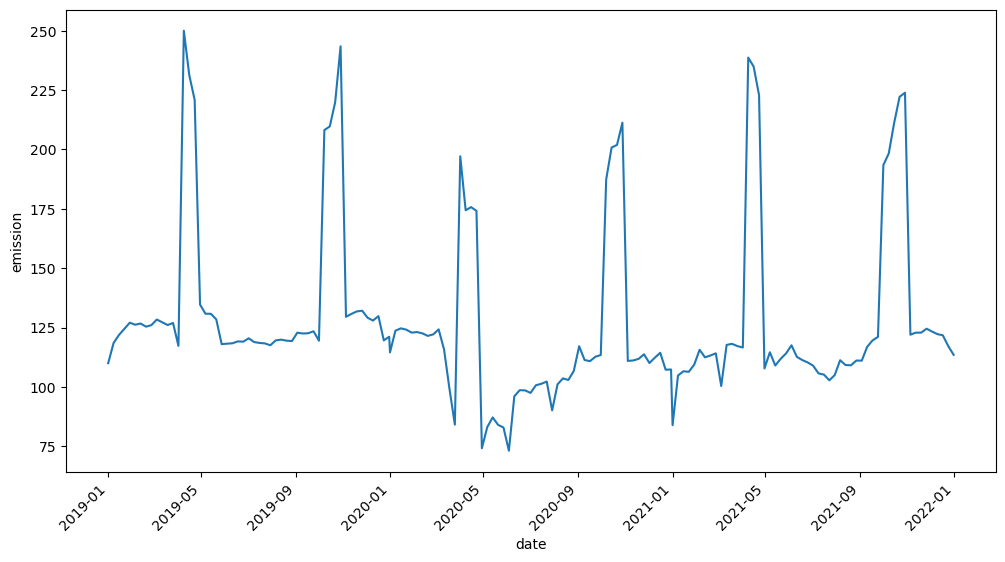

Dates with lowest emissions:
CPU times: total: 172 ms
Wall time: 230 ms


date
2020-03-18     99.259068
2020-03-25     84.085532
2020-04-29     74.142530
2020-05-06     83.065750
2020-05-13     87.126493
2020-05-20     84.002552
2020-05-27     82.864621
2020-06-03     73.098295
2020-06-10     96.012905
2020-06-17     98.596475
2020-06-24     98.524512
2020-07-01     97.441265
2020-07-08    100.681434
2020-07-15    101.294815
2020-07-22    102.242162
2020-07-29     90.091030
2020-08-05    101.072553
2020-08-12    103.565370
2020-08-19    102.905435
2020-08-26    106.650352
2020-12-23    107.233415
2020-12-30    107.319817
2021-01-01     83.852945
2021-01-08    104.786550
2021-01-15    106.572760
2021-01-22    106.352975
2021-03-05    100.367595
2021-04-30    107.747749
2021-05-14    108.997302
2021-07-02    108.945240
2021-07-09    105.672485
2021-07-16    105.171747
2021-07-23    102.764980
2021-07-30    104.959855
2021-08-20    109.085270
Name: emission, dtype: float64

In [128]:
%%time

train_and_test_high = train_and_test.loc[train_and_test["Location_group"] == 'High']
train_and_test_high_by_date = train_and_test_high.groupby('date')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = train_and_test_high_by_date['emission'].median(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

print('Dates with lowest emissions:')
train_and_test_high_by_date['emission'].median().sort_values().head(35).sort_index()



Same period. Let's exclude this period and look if this improves our scores. 

In [129]:
%%time

covid_start = pd.to_datetime('2020-03-18')
covid_finish = pd.to_datetime('2020-08-26')


train_no_covid = train.loc[(train['date'] < covid_start) | 
                                                (train['date'] > covid_finish)  , :]

train.to_csv('new_datasets/train_with_covid_1_{}.csv'.format(study_number))
train_no_covid.to_csv('new_datasets/train_no_covid_1_{}.csv'.format(study_number))

# Remove all new columns
selected_columns = list(set(test.columns) - {'date', 'WeekCount', 'Location', 'Location_group'})

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]


train_selected.to_csv('new_datasets/train_1_02.csv')
test_selected.to_csv('new_datasets/test_1_02.csv')


CPU times: total: 16 s
Wall time: 18 s


I recalculated the number of splits in ['functons/n_splits_2.py']('functons/n_splits_2.py') and found that 6 splits is still optimal for the truncated dataset.

In [130]:
%%time

train_score, cross_score, cross_scores_std, submission = \
                get_score(global_variables, train_selected, test_selected, model, scores_df,
                                        comment="No covid")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 48.7 s
Wall time: 5.34 s


In [131]:
scores_df.loc[int(study_number), 'Test RMSE'] = 45.00252
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                      No covid   14.556626      152.802403   45.00252

Change in Cross-val score is not representative, since we have less data, so we'll consider improvement of Test RMSE as a good sign.

Next, let's try to introduce WeekCount:

## 03. WeekCount

In [132]:
%%time

study_number = '03'

selected_columns.append('WeekCount')

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]

train_score, cross_score, cross_scores_std, submission = \
                get_score(global_variables, train_selected, test_selected, model, scores_df,
                                        comment="+ WeekCount")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 49.3 s
Wall time: 4.85 s


In [133]:
scores_df.loc[int(study_number), 'Test RMSE'] = 44.98007
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                      No covid   14.556626      152.802403   45.00252
3                   + WeekCount   14.413518      153.047134   44.98007

We have a slight increase of Cross-val RMSE, so we'll remove this feature.

In [134]:
selected_columns.remove('WeekCount')

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]

## 04. Location_enc

We have 497 unique locations. We need to express Location as a numerical feature (or features). We'll create a feature Location_enc, using Mean Target Encoding, so locations with similar mean emissions (in the training set) will have similar Location_enc values.


In [135]:
study_number = '04'

# Change the datasets name to more convinient

no_covid_len = len(train_no_covid)
train = train_no_covid.copy(deep=True)


# !pip install feature_engine
from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder()

train['Location'] = train['Location'].astype('category')
test['Location'] = test['Location'].astype('category')

train['Location_enc'] = encoder.fit_transform(train[['Location']], train['emission'])
test['Location_enc'] = encoder.transform(test[['Location']])

feature_name = 'Location_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())

<class 'pandas.core.series.Series'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
67095 non-null  float64
dtypes: float64(1)
memory usage: 3.0+ MB
None
count    67095.000000
mean        84.492339
std        141.554103
min          0.000000
25%         11.277943
50%         48.129771
75%        115.427646
max       2280.935267
Name: Location_enc, dtype: float64
Unique Values and their count:
0.000000      2025
4.377785       135
104.414210     135
315.244824     135
345.406888     135
              ... 
42.862704      135
116.942048     135
68.303494      135
90.549574      135
28.512338      135
Name: Location_enc, Length: 483, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
24353 non-null  float64
dtypes: float64(1)
memory usage: 380.5+

Let's test:

In [136]:
%%time

selected_columns.append('Location_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="2 + Location_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

CPU times: total: 48 s
Wall time: 4.62 s


In [137]:
scores_df.loc[int(study_number), 'Test RMSE'] = 34.14359
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                      No covid   14.556626      152.802403   45.00252
3                   + WeekCount   14.413518      153.047134   44.98007
4              2 + Location_enc    6.537063       63.507568   34.14359

Great, that worked. What if we'll do the same trick with Week of the year?

## 05. Week of the year Mean Target Encoding

In [138]:
study_number = '05'

from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder()

train['week_no_category'] = train['week_no'].astype('category')
test['week_no_category'] = test['week_no'].astype('category')

train['week_no_enc'] = encoder.fit_transform(train[['week_no_category']], train['emission'])
test['week_no_enc'] = encoder.transform(test[['week_no_category']])

feature_name = 'week_no_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: week_no_enc
Non-Null Count  Dtype  
--------------  -----  
67095 non-null  float64
dtypes: float64(1)
memory usage: 3.0+ MB
None
count    67095.000000
mean        84.492339
std         11.329124
min         72.088003
25%         77.936882
50%         81.144497
75%         84.303210
max        122.231922
Name: week_no_enc, dtype: float64
Unique Values and their count:
72.088003     1491
115.211546    1491
79.366690     1491
79.985492     1491
80.843326     1491
86.388165     1491
103.587349    1491
106.899378    1491
110.402315    1491
81.144497     1491
80.885773     1491
81.831373     1491
82.322285     1491
83.484188     1491
81.286079     1491
80.913570     1491
81.764307     1491
76.659700     1491
79.200567     1491
76.113475     1491
83.061364     1491
83.517704     1491
84.689304     1491
85.618840     1491
84.984527     1491
84.303210     1491
84.936751  

Let's test:

In [139]:
%%time

selected_columns.append('week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ week_no_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

CPU times: total: 50.5 s
Wall time: 5.17 s


In [140]:
scores_df.loc[int(study_number), 'Test RMSE'] = 33.189
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                      No covid   14.556626      152.802403   45.00252
3                   + WeekCount   14.413518      153.047134   44.98007
4              2 + Location_enc    6.537063       63.507568   34.14359
5                 + week_no_enc    5.526572       63.508203   33.18900

Nope, that didn't work. Let's remove this feature.

In [141]:
selected_columns.remove('week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]


## 06. Location_group_enc

Now, let's encode in the same way our Location Groups:

In [142]:
study_number = '06'

encoder = MeanEncoder()

train['Location_group'] = train['Location_group'].astype('category')
test['Location_group'] = test['Location_group'].astype('category')

train['Location_group_enc'] = encoder.fit_transform(train[['Location_group']], train['emission'])
test['Location_group_enc'] = encoder.transform(test[['Location_group']])

feature_name = 'Location_group_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_group_enc
Non-Null Count  Dtype  
--------------  -----  
67095 non-null  float64
dtypes: float64(1)
memory usage: 3.0+ MB
None
count    67095.000000
mean        84.492339
std        127.263173
min         34.415806
25%         34.415806
50%         34.415806
75%        158.718906
max       2280.935267
Name: Location_group_enc, dtype: float64
Unique Values and their count:
34.415806      43605
158.718906     23220
1295.799952      135
2280.935267      135
Name: Location_group_enc, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_group_enc
Non-Null Count  Dtype  
--------------  -----  
24353 non-null  float64
dtypes: float64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean        84.492339
std        127.264838
min         34.415806
25%         34.41

In [143]:
%%time

selected_columns.append('Location_group_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="4 + Location_group_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

CPU times: total: 50.4 s
Wall time: 5.08 s


In [144]:
scores_df.loc[int(study_number), 'Test RMSE'] = 34.20915
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                      No covid   14.556626      152.802403   45.00252
3                   + WeekCount   14.413518      153.047134   44.98007
4              2 + Location_enc    6.537063       63.507568   34.14359
5                 + week_no_enc    5.526572       63.508203   33.18900
6        4 + Location_group_enc    6.246773       62.532524   34.20915

Good, Cross-val RMSE went down, so the feature stays.

## 07. LightGBM tuning

Here we'll do hyperparameters tuning of the LightGBM regressor with n_estimators = 100. 

All the hyperparameters tuning will be done in separate files, for the sake of runtime.

In [145]:
study_number = '07'

train_selected.to_csv('new_datasets/train_1_{}.csv'.format(study_number))
test_selected.to_csv('new_datasets/test_1_{}.csv'.format(study_number))

In [146]:
import pickle

with open('studies/1_' + study_number + '_params.pkl', 'rb') as f:
    best_params = pickle.load(f)
    
# print("Best Cross-val RMSE:", study.best_trial.value)
print("Best hyperparameters:", best_params)

Best hyperparameters: {'num_leaves': 60, 'max_depth': 20, 'learning_rate': 0.13123577914490067, 'min_child_weight': 30.502797736087448, 'min_child_samples': 60, 'subsample': 0.5, 'subsample_freq': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.32954349026120533, 'reg_lambda': 99.58026125458638}


Let's test:

In [147]:
%%time

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1, **best_params)

train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                   train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ tuning")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 59.1 s
Wall time: 6.34 s


In [148]:
scores_df.loc[int(study_number), 'Test RMSE'] = 45.61363
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                      No covid   14.556626      152.802403   45.00252
3                   + WeekCount   14.413518      153.047134   44.98007
4              2 + Location_enc    6.537063       63.507568   34.14359
5                 + week_no_enc    5.526572       63.508203   33.18900
6        4 + Location_group_enc    6.246773       62.532524   34.20915
7                      + tuning   17.956427       52.431363   45.61363

The Test RMSE went up. It seems that the tuning overfitted the model to the cross-validation splits. 

We'll use the standard parameters then.
Let's look at feature importances:

In [149]:
%%time

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1)

## Train the model on the whole training set
model.fit(train_selected.drop(['emission'], axis=1), train['emission'])

feature_importances = pd.Series(data=model.feature_importances_, 
                                index=train_selected.drop(['emission'], axis=1).columns)

print('Sorted feature importances (first 40):')
feature_importances.sort_values(ascending=False).head(40)

Sorted feature importances (first 40):
CPU times: total: 7.62 s
Wall time: 862 ms


Location_enc                                                685
week_no                                                     465
longitude                                                   196
latitude                                                    194
Location_group_enc                                          121
Ozone_O3_column_number_density                              114
year                                                         97
CarbonMonoxide_CO_column_number_density                      87
Ozone_solar_azimuth_angle                                    70
Cloud_solar_azimuth_angle                                    60
Cloud_surface_albedo                                         54
CarbonMonoxide_solar_azimuth_angle                           53
UvAerosolIndex_absorbing_aerosol_index                       45
UvAerosolIndex_solar_azimuth_angle                           43
Cloud_solar_zenith_angle                                     40
Ozone_O3_slant_column_number_density    

Even though we have 'Location_enc' and Location_group_enc, latitudes and longitudes are still important. That gives me an idea for the next step:


## 08. Geographical clustering

The importance of latitude and longitude suggest benefits of creating location clusters: groups of locations that situated nearby. We'll also account for 'emissions' to make clusters depending on similar emissions.

First we'll create an elbow plot to detrmine an optimal number of clusters:

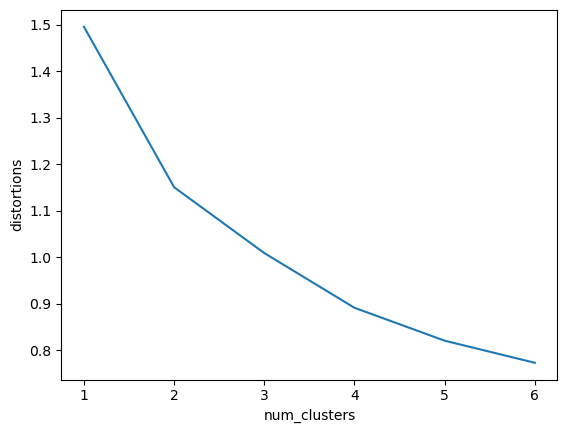

CPU times: total: 2.7 s
Wall time: 2.52 s


In [150]:
%%time

study_number = '08'

from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns


# Create cluster data
cluster_data = train[['latitude', 'longitude', 'emission']]

# Normalize data
cluster_data = pd.DataFrame(StandardScaler().fit_transform(cluster_data),
                            columns=['latitude', 'longitude', 'emission'],
                           index=cluster_data.index)

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(cluster_data, k_or_guess=i, seed=SEED)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

It seems that the optimal number of clusters is 2. Let's look how they are situated geographically:

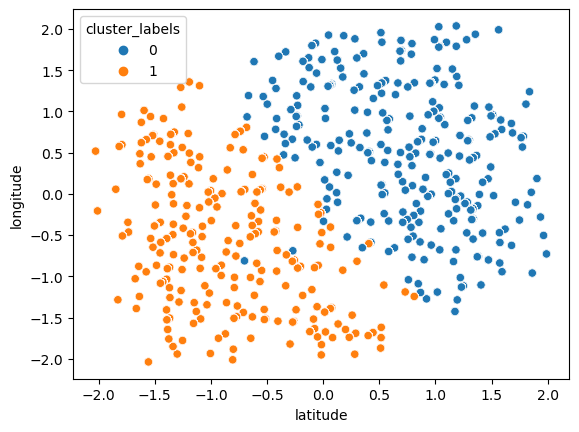

CPU times: total: 1.81 s
Wall time: 1.95 s


In [151]:
%%time

cluster_centers, distortion = kmeans(cluster_data, k_or_guess=2, seed=SEED)


# Assign cluster labels
cluster_data['cluster_labels'], _ = vq(cluster_data, cluster_centers)


# Create a scatter plot
sns.scatterplot(x='latitude', y='longitude', hue='cluster_labels', data=cluster_data)
plt.show()

Quite a nice geographical border with just a few outliers (due to 'emission'). Let's test:

In [152]:
%%time

# Save the cluster labels into train and set
clusters = pd.concat([train['Location'], cluster_data['cluster_labels']], axis=1)
clusters = pd.pivot_table(clusters, values=['cluster_labels'], index=['Location'])
clusters = pd.Series(clusters['cluster_labels'])

train['Location_cluster_2'] = train['Location'].map(clusters)
test['Location_cluster_2'] = test['Location'].map(clusters)

selected_columns.append('Location_cluster_2')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                     train_selected,
                                                                     test_selected, 
                                                                      model, scores_df,
                                                                  comment="6 + Location_cluster_2")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

CPU times: total: 47.3 s
Wall time: 4.68 s


In [153]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                      No covid   14.556626      152.802403   45.00252
3                   + WeekCount   14.413518      153.047134   44.98007
4              2 + Location_enc    6.537063       63.507568   34.14359
5                 + week_no_enc    5.526572       63.508203   33.18900
6        4 + Location_group_enc    6.246773       62.532524   34.20915
7                      + tuning   17.956427       52.431363   45.61363
8        6 + Location_cluster_2    6.251627       62.488075        NaN

Indeed, there is a small improvement.

## 09. Filling NaNs based on 2 features

Now we'll use the 2 most important features in calculating distances for kNN imputaton of missing values. They contain information about location and week of the year.

The cell below took a long time to execute, so I saved the results into files to not re-run this cell Uncomment the cell to re-run.

In [154]:
%%time

study_number = '09'

train_selected_filled = pd.read_csv('new_datasets/train_selected_filled.csv',
                                    index_col='ID_LAT_LON_YEAR_WEEK')
test_selected_filled = pd.read_csv('new_datasets/test_selected_filled.csv',
                               index_col='ID_LAT_LON_YEAR_WEEK')

# from sklearn.impute import KNNImputer

# # define imputer
# imputer = KNNImputer(weights='distance')

# # The most important features 
# selected_columns_1 = list(feature_importances.sort_values(ascending=False).index[:2])
# features_train = train[selected_columns_1]
# features_test =  test[selected_columns_1]

# #Dataframes to fill
# train_selected_filled = train_selected.copy(deep=True)
# test_selected_filled = test_selected.copy(deep=True)


# # For each column with missing values
# for column in list(train_selected.columns[train_selected.isna().any()]):
    
#     # Create a DataFrame of a feature with missing values and the most important features
#     df_to_fill_train = pd.concat([train[column], features_train], axis=1)
#     df_to_fill_test = pd.concat([test[column], features_test], axis=1)
                                  
#     # fit on the dataset
#     imputer.fit(df_to_fill_train)
#     # transform the datasets
#     Xtrans = imputer.transform(df_to_fill_train)
#     train_selected_filled[column] = Xtrans[:, 0]
#     Xtrans = imputer.transform(df_to_fill_test)
#     test_selected_filled[column] = Xtrans[:, 0]



CPU times: total: 969 ms
Wall time: 987 ms


In [155]:
print(train_selected_filled.info())
print(test_selected_filled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 78 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Cloud_cloud_optical_depth                                 67095 non-null  float64
 1   SulphurDioxide_cloud_fraction                             67095 non-null  float64
 2   SulphurDioxide_SO2_column_number_density_15km             67095 non-null  float64
 3   UvAerosolLayerHeight_sensor_azimuth_angle                 67095 non-null  float64
 4   CarbonMonoxide_solar_zenith_angle                         67095 non-null  float64
 5   UvAerosolLayerHeight_aerosol_pressure                     67095 non-null  float64
 6   Formaldehyde_sensor_azimuth_angle                         67095 non-null  float64
 7   UvAerosolIndex_sensor_altitude                            67095 no

In [156]:
train_selected_filled.to_csv('new_datasets/train_selected_filled.csv')
test_selected_filled.to_csv('new_datasets/test_selected_filled.csv')

In [157]:
%%time

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment=" + Filled based on 2")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 43.8 s
Wall time: 4.47 s


In [158]:
scores_df.loc[int(study_number), 'Test RMSE'] = 42.76071
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                   Just median  148.806038             NaN  169.19374
1  LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                      No covid   14.556626      152.802403   45.00252
3                   + WeekCount   14.413518      153.047134   44.98007
4              2 + Location_enc    6.537063       63.507568   34.14359
5                 + week_no_enc    5.526572       63.508203   33.18900
6        4 + Location_group_enc    6.246773       62.532524   34.20915
7                      + tuning   17.956427       52.431363   45.61363
8        6 + Location_cluster_2    6.251627       62.488075        NaN
9           + Filled based on 2    6.225799       48.515175   42.76071

Since we filled missing values using the whole training set, we need to look at Test RMSE to evaluate if filling works. And we can see that it doesn't.

## 10. Filling NaNs based on all features

Now we'll use all features in calculating distances for kNN imputaton of missing values. 

Uncomment to re-run.


In [159]:
%%time

study_number = '10'

train_selected_filled = pd.read_csv('new_datasets/train_selected_filled_10.csv',
                                    index_col='ID_LAT_LON_YEAR_WEEK')
test_selected_filled = pd.read_csv('new_datasets/test_selected_filled_10.csv',
                               index_col='ID_LAT_LON_YEAR_WEEK')

# # define imputer
# imputer = KNNImputer(weights='distance')
# # fit on the dataset and transform the datasets
# Xtrans = imputer.fit_transform(train_selected.drop('emission', axis=1))
# #Xtrans = imputer.transform(train_selected.drop('emission', axis=1))
# train_selected_filled = pd.DataFrame(Xtrans, index=train_selected.index)
# train_selected_filled = pd.concat([train_selected_filled, train_selected['emission']], axis=1)
# train_selected_filled.columns = train_selected.columns
# Xtrans = imputer.transform(test_selected)
# test_selected_filled = pd.DataFrame(Xtrans, index=test_selected.index, columns=test_selected.columns)


CPU times: total: 1.02 s
Wall time: 1.09 s


In [160]:
print(train_selected_filled.info())
print(test_selected_filled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 78 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Cloud_cloud_optical_depth                                 67095 non-null  float64
 1   SulphurDioxide_cloud_fraction                             67095 non-null  float64
 2   SulphurDioxide_SO2_column_number_density_15km             67095 non-null  float64
 3   UvAerosolLayerHeight_sensor_azimuth_angle                 67095 non-null  float64
 4   CarbonMonoxide_solar_zenith_angle                         67095 non-null  float64
 5   UvAerosolLayerHeight_aerosol_pressure                     67095 non-null  float64
 6   Formaldehyde_sensor_azimuth_angle                         67095 non-null  float64
 7   UvAerosolIndex_sensor_altitude                            67095 no

In [161]:
train_selected_filled.to_csv('new_datasets/train_selected_filled_10.csv')
test_selected_filled.to_csv('new_datasets/test_selected_filled_10.csv')

In [162]:
%%time

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="8 + Filled based on all")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 43.4 s
Wall time: 4.35 s


In [163]:
scores_df.loc[int(study_number), 'Test RMSE'] = 33.80227
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227

Alright, this filling works.

## Saving predictions

At this point, let's save the predictions of our best model into a separate feature: 'pred_1_10'.

Then we'll subtract this feature from 'emission' to get 'emission_1_10'

In the future steps we may try to predict this feature and then convert it into 'emission'.

Additionally, for the next steps we'll use simpler cross-validation: we'll just split our 'train' once on a training and cross-validation sets.

Let's set up and test everything:

In [164]:
# Change the names to more convenient

train_and_cv_unfilled = train.copy(deep=True)
test_unfilled = test.copy(deep=True)

In [165]:
X_train_and_cv = train_selected_filled.drop('emission', axis=1)
y_train_and_cv = pd.DataFrame(train_selected_filled['emission'], 
                       index=train_selected_filled.index, columns=['emission'])
X_test = test_selected_filled

In [166]:
%%time

## Create 'pred_1_10'

model.fit(X_train_and_cv, y_train_and_cv['emission'])

y_train_and_cv['pred_1_10'] = model.predict(X_train_and_cv)
y_test = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['pred_1_10'])

## Create 'emission_1_10'

y_train_and_cv['emission_1_10'] = y_train_and_cv['emission'] - y_train_and_cv['pred_1_10']

print(y_train_and_cv.info())
y_train_and_cv.head()

<class 'pandas.core.frame.DataFrame'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   emission       67095 non-null  float64
 1   pred_1_10      67095 non-null  float64
 2   emission_1_10  67095 non-null  float64
dtypes: float64(3)
memory usage: 4.1+ MB
None
CPU times: total: 8.67 s
Wall time: 958 ms


emission  pred_1_10  emission_1_10
ID_LAT_LON_YEAR_WEEK                                        
ID_-0.510_29.290_2019_00  3.750994   2.846933       0.904061
ID_-0.510_29.290_2019_01  4.025176   4.308517      -0.283341
ID_-0.510_29.290_2019_02  4.231381   4.661419      -0.430038
ID_-0.510_29.290_2019_03  4.305286   5.143049      -0.837764
ID_-0.510_29.290_2019_04  4.347317   4.757918      -0.410601

In [167]:
## Divide on train and cv


# Calculate the proportion of test set weeks compared to the total number of weeks
proportion = len(X_test) / (len(X_train_and_cv) + len(X_test))

# Calculate the desired amount of weeks in the cross-validation set
train_and_cv_weeks = len(train_and_cv_unfilled['WeekCount'].unique())
cv_weeks = round(train_and_cv_weeks * proportion)
train_weeks = train_and_cv_weeks - cv_weeks
test_weeks = len(test_unfilled['WeekCount'].unique())

print('Weeks in the training set: {}'.format(train_weeks))
print('Weeks in the cross-validation set: {}'.format(cv_weeks))
print('Weeks in the test set: {}'.format(test_weeks))

# Create training, cross-validation and test sets
train_unfilled = pd.DataFrame(train_and_cv_unfilled.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
cv_unfilled = pd.DataFrame(train_and_cv_unfilled.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])
X_train = pd.DataFrame(X_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
y_train = pd.DataFrame(y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
X_cv = pd.DataFrame(X_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])
y_cv = pd.DataFrame(y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])

print("The last 5 rows of the cross-validation set:")

X_cv.tail()

Weeks in the training set: 99
Weeks in the cross-validation set: 36
Weeks in the test set: 49
The last 5 rows of the cross-validation set:


Cloud_cloud_optical_depth  \
ID_LAT_LON_YEAR_WEEK                                  
ID_-3.299_30.301_2021_48                  20.245954   
ID_-3.299_30.301_2021_49                   6.104610   
ID_-3.299_30.301_2021_50                  14.817885   
ID_-3.299_30.301_2021_51                  32.594768   
ID_-3.299_30.301_2021_52                  19.464032   

                          SulphurDioxide_cloud_fraction  \
ID_LAT_LON_YEAR_WEEK                                      
ID_-3.299_30.301_2021_48                       0.191313   
ID_-3.299_30.301_2021_49                       0.177222   
ID_-3.299_30.301_2021_50                       0.211649   
ID_-3.299_30.301_2021_51                       0.184209   
ID_-3.299_30.301_2021_52                       0.000000   

                          SulphurDioxide_SO2_column_number_density_15km  \
ID_LAT_LON_YEAR_WEEK                                                      
ID_-3.299_30.301_2021_48                                       0.000131   
ID_-3.299_30.301_2021_49                                       0.000030   
ID_-3.299_30.301_2021_50                                      -0.000009   
ID_-3.299_30.301_2021_51                                      -0.000015   
ID_-3.299_30.301_2021_52                                      -0.000039   

                          UvAerosolLayerHeight_sensor_azimuth_angle  \
ID_LAT_LON_YEAR_WEEK                                                  
ID_-3.299_30.301_2021_48                                  74.540157   
ID_-3.299_30.301_2021_49                                  35.158371   
ID_-3.299_30.301_2021_50                                  26.899462   
ID_-3.299_30.301_2021_51                                  76.258414   
ID_-3.299_30.301_2021_52                                  76.919270   

                          CarbonMonoxide_solar_zenith_angle  \
ID_LAT_LON_YEAR_WEEK                                          
ID_-3.299_30.301_2021_48                          35.158394   
ID_-3.299_30.301_2021_49                          31.659301   
ID_-3.299_30.301_2021_50                          26.133751   
ID_-3.299_30.301_2021_51                          33.910437   
ID_-3.299_30.301_2021_52                          27.037703   

                          UvAerosolLayerHeight_aerosol_pressure  \
ID_LAT_LON_YEAR_WEEK                                              
ID_-3.299_30.301_2021_48                           72632.818005   
ID_-3.299_30.301_2021_49                           73338.362453   
ID_-3.299_30.301_2021_50                           62137.022847   
ID_-3.299_30.301_2021_51                           67102.982057   
ID_-3.299_30.301_2021_52                           70867.086853   

                          Formaldehyde_sensor_azimuth_angle  \
ID_LAT_LON_YEAR_WEEK                                          
ID_-3.299_30.301_2021_48                         -12.722546   
ID_-3.299_30.301_2021_49                         -41.457341   
ID_-3.299_30.301_2021_50                         -99.850349   
ID_-3.299_30.301_2021_51                        -100.344827   
ID_-3.299_30.301_2021_52                          76.825638   

                          UvAerosolIndex_sensor_altitude  \
ID_LAT_LON_YEAR_WEEK                                       
ID_-3.299_30.301_2021_48                   830256.625375   
ID_-3.299_30.301_2021_49                   830194.790526   
ID_-3.299_30.301_2021_50                   830174.000296   
ID_-3.299_30.301_2021_51                   830032.493363   
ID_-3.299_30.301_2021_52                   830135.529818   

                          Formaldehyde_tropospheric_HCHO_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                             
ID_-3.299_30.301_2021_48                                           0.000064      
ID_-3.299_30.301_2021_49                                           0.000101      
ID_-3.299_30.301_2021_50                                          -0.000069      
ID_-3.299_30.301_

In [168]:
len(train_and_cv_unfilled['WeekCount'].unique())

135

In [169]:
len(train_unfilled['WeekCount'].unique())

99

In [170]:
len(cv_unfilled['WeekCount'].unique())

36

In [171]:
## Test the setup

print("Predicting 'emission' directly:")

model.fit(X_train, y_train['emission'])

pred_train = model.predict(X_train)
print('Train RMSE: {}'.format(mean_squared_error(y_train['emission'], pred_train, squared=False)))
pred_cv = model.predict(X_cv)
print('Cross-val RMSE: {}'.format(mean_squared_error(y_cv['emission'], pred_cv, squared=False)))


print("Predicting 'emission_1_10' and then transforming into 'emission':")

model.fit(X_train, y_train['emission_1_10'])

pred_train = model.predict(X_train) + y_train['pred_1_10']
print('Train RMSE: {}'.format(mean_squared_error(y_train['emission'], pred_train, squared=False)))
pred_cv = model.predict(X_cv) + y_cv['pred_1_10']
print('Cross-val RMSE: {}'.format(mean_squared_error(y_cv['emission'], pred_cv, squared=False)))


Predicting 'emission' directly:
Train RMSE: 8.814735256280152
Cross-val RMSE: 22.231199045130698
Predicting 'emission_1_10' and then transforming into 'emission':
Train RMSE: 7.14455763303402
Cross-val RMSE: 8.037930881493933


Note, that two-layered prediction gives us better Cross-val RMSE, but it may be due to the naive appoach we took in constructing residuals. Let's create benchmarks, so we could compare to the future steps:

## 11. Predicting 'emission' directly, a new cross-val method

In [172]:
study_number = '11'


scores_df.loc[int(study_number), 'Comment'] = '+ new cross-val method'
model.fit(X_train, y_train['emission'])

pred_train = model.predict(X_train)
error_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
pred_cv = model.predict(X_cv)
error_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv
scores_df.loc[int(study_number), 'Test RMSE'] = 33.80227
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227

## 12. Predicting 'emission_1_10' and then transforming into 'emission'

In [173]:
%%time

study_number = '12'


scores_df.loc[int(study_number), 'Comment'] = '+ Second layer'
model.fit(X_train, y_train['emission_1_10'])

pred_train = model.predict(X_train) + y_train['pred_1_10']
error_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
pred_cv = model.predict(X_cv)  + y_cv['pred_1_10']
error_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
model.fit(X_train_and_cv, y_train_and_cv['emission_1_10'])
pred_test = pd.DataFrame(model.predict(X_test) + y_test['pred_1_10'])
pred_test.columns = ['emission']
pred_test.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 13.6 s
Wall time: 1.36 s


In [174]:
scores_df.loc[int(study_number), 'Test RMSE'] = 34.1329
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227
12                + Second layer    7.144558        8.037931   34.13290

Indeed, the Test RMSE for the double-layered prediction is higher.

## Principal components.

Now, let's reduce dimensionality of our dataset, transforming features to principal components.

We'll do so to achieve 3 goals:

-) Avoid possible overfitting

-) Reduce the runtime for testing and hyperparameters tuning

-) Train estimators separately for each Location, without having the curse dimensionality 

First, we'll create elbow plots of explained variance by number of principal components. We'll do so for each Location Group.

Group: Low


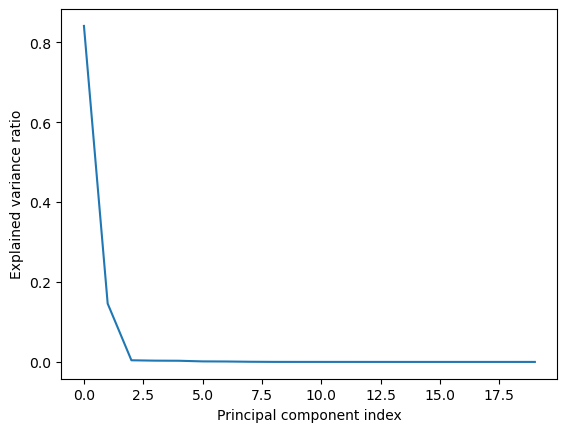

Group: High


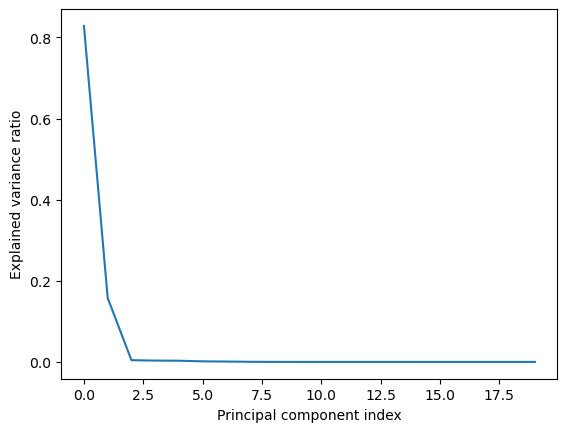

Group: Special 1


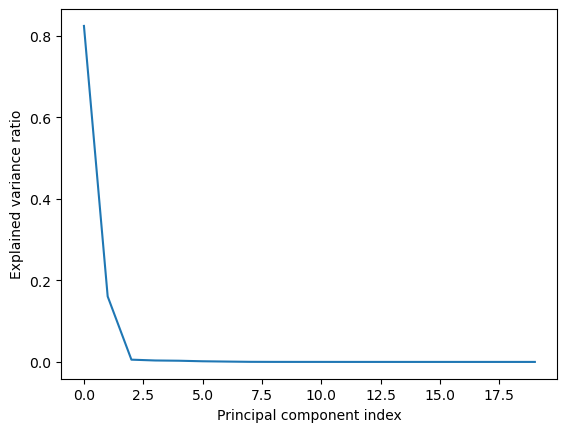

Group: Special 2


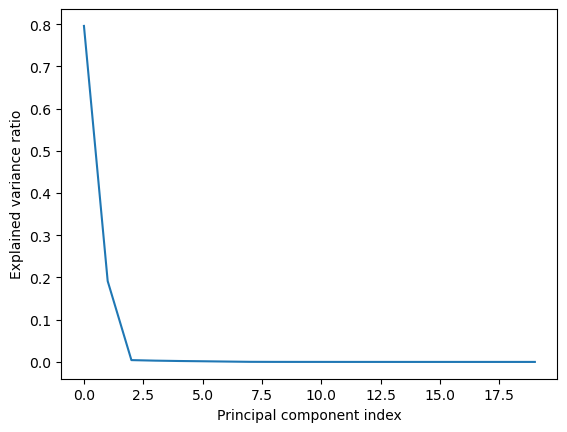

CPU times: total: 1.98 s
Wall time: 886 ms


In [175]:
%%time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)


# For each location group:
for group in train_and_cv_unfilled['Location_group'].unique():
    print('Group: {}'.format(group))
    # Choose data
    data = X_train_and_cv.loc[train_and_cv_unfilled['Location_group'] == group, :]
    # Fit PCA
    pca.fit(data)
    # Plot the explained variance ratio
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal component index')
    plt.ylabel('Explained variance ratio')
    plt.show()


Interestingly, most of variance is explained just by 2 principal components.

Here is what we will do next:

We'll work with each location separately. For each location

-) We'll transform our features into 2 components.

-) We'll predict 'emission' directly 

-) We'll do double-layerd prediction, as in 12

Then we'll combine our prediction from all locations and calculate scores.

Let's go:

In [176]:
%%time

pca = PCA(n_components = 2)

# DataFrames with predictions
pred_train = pd.DataFrame(index=X_train.index, columns=['direct', 'two-layered'])
pred_cv = pd.DataFrame(index=X_cv.index, columns=['direct', 'two-layered'])
pred_test = pd.DataFrame(index=X_test.index, columns=['direct', 'two-layered'])

# For each location:
for location in train_and_cv_unfilled['Location'].unique():
    print('Location: {}'.format(location))
    # Choose data
    location_X_train_and_cv = X_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_X_train = X_train.loc[train_unfilled['Location'] == location, :]
    location_X_cv = X_cv.loc[cv_unfilled['Location'] == location, :]
    location_X_test = X_test.loc[test_unfilled['Location'] == location, :]
    location_y_train_and_cv = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_y_train = y_train.loc[train_unfilled['Location'] == location, :]
    location_y_cv = y_cv.loc[cv_unfilled['Location'] == location, :]
    location_y_test = y_test.loc[test_unfilled['Location'] == location, :]
    # Fit PCA
    pca.fit(location_X_train_and_cv)
    
    # Transform train, cv and test feature sets
    location_X_train_and_cv = pca.transform(location_X_train_and_cv)
    location_X_train = pca.transform(location_X_train)
    location_X_cv = pca.transform(location_X_cv)
    location_X_test = pca.transform(location_X_test)
    
    # Create predictions directly
    model.fit(location_X_train, location_y_train['emission'])
    location_pred_train = model.predict(location_X_train)
    location_pred_cv = model.predict(location_X_cv)
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission'])
    location_pred_test = model.predict(location_X_test)
    
    
    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'direct'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'direct'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'direct'] = location_pred_test
    
    # Create double-layered predictions 
    model.fit(location_X_train, location_y_train['emission_1_10'])
    location_pred_train = model.predict(location_X_train) + location_y_train['pred_1_10']
    location_pred_cv = model.predict(location_X_cv) + location_y_cv['pred_1_10']
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission_1_10'])
    location_pred_test = model.predict(location_X_test) + location_y_test['pred_1_10']
    
    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'two-layered'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'two-layered'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'two-layered'] = location_pred_test
    
#     print(pred_train.info())
#     print(pred_cv.info())
#     print(pred_test.info())


Location: -0.5129.29
Location: -0.52829.472
Location: -0.54729.653
Location: -0.56930.031
Location: -0.59829.102
Location: -0.60429.896
Location: -0.61530.885
Location: -0.62729.773
Location: -0.63730.763
Location: -0.65330.447
Location: -0.65930.341
Location: -0.66730.433
Location: -0.67729.623
Location: -0.70229.798
Location: -0.7230.48
Location: -0.72629.374
Location: -0.72730.573
Location: -0.76629.534
Location: -0.78529.115
Location: -0.78730.513
Location: -0.79330.607
Location: -0.79829.402
Location: -0.79929.201
Location: -0.80129.499
Location: -0.80631.494
Location: -0.82930.471
Location: -0.83729.863
Location: -0.84330.657
Location: -0.85330.647
Location: -0.85530.145
Location: -0.85930.441
Location: -0.86630.734
Location: -0.86929.231
Location: -0.87130.029
Location: -0.90529.495
Location: -0.90529.995
Location: -0.91528.985
Location: -0.92529.875
Location: -0.93329.267
Location: -0.93529.765
Location: -0.93829.262
Location: -0.94230.258
Location: -0.9531.45
Location: -0.9563

Location: -2.40430.496
Location: -2.40729.393
Location: -2.42228.778
Location: -2.42728.673
Location: -2.43129.269
Location: -2.43229.568
Location: -2.43630.464
Location: -2.4429.06
Location: -2.44128.959
Location: -2.44328.657
Location: -2.44728.353
Location: -2.45128.249
Location: -2.46630.334
Location: -2.47929.421
Location: -2.48430.116
Location: -2.48928.811
Location: -2.49129.309
Location: -2.49628.504
Location: -2.51729.883
Location: -2.52129.179
Location: -2.52229.078
Location: -2.53928.461
Location: -2.54829.752
Location: -2.55529.145
Location: -2.56129.839
Location: -2.57130.029
Location: -2.58329.617
Location: -2.58829.912
Location: -2.58928.311
Location: -2.59528.905
Location: -2.59929.801
Location: -2.60229.898
Location: -2.6128.79
Location: -2.62328.977
Location: -2.63829.562
Location: -2.6429.46
Location: -2.64329.257
Location: -2.64928.651
Location: -2.65229.148
Location: -2.65530.245
Location: -2.65629.744
Location: -2.65630.944
Location: -2.66230.138
Location: -2.6732

Now, we can test both ways.

## 13. PC by location (direct)

In [177]:
%%time

study_number = '13'


scores_df.loc[int(study_number), 'Comment'] = '11 + PC by location'

error_train = mean_squared_error(y_train['emission'], pred_train['direct'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['direct'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['direct'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 406 ms
Wall time: 91.6 ms


In [178]:
scores_df.loc[int(study_number), 'Test RMSE'] = 62.64639
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227
12                + Second layer    7.144558        8.037931   34.13290
13           11 + PC by location   41.398523       39.640607   62.64639

## 14. PC by location (two-layered)

In [179]:
%%time

study_number = '14'


scores_df.loc[int(study_number), 'Comment'] = '12 + PC by location'

error_train = mean_squared_error(y_train['emission'], pred_train['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['two-layered'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 31.2 ms
Wall time: 62.9 ms


In [180]:
scores_df.loc[int(study_number), 'Test RMSE'] = 34.05845
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227
12                + Second layer    7.144558        8.037931   34.13290
13           11 + PC by location   41.398523       39.640607   62.64639
14           12 + PC by location    7.856535        8.286951   34.05845

What if we calculate principal components on the whole dataset and then do a separat predction for every location?

In [181]:
%%time

pca = PCA(n_components = 2)

# Fit PCA
pca.fit(X_train_and_cv)
# Transform train, cv and test feature sets
pc_X_train_and_cv = pd.DataFrame(pca.transform(X_train_and_cv), index=X_train_and_cv.index)
pc_X_train = pd.DataFrame(pca.transform(X_train), index=X_train.index)
pc_X_cv = pd.DataFrame(pca.transform(X_cv), index=X_cv.index)
pc_X_test = pd.DataFrame(pca.transform(X_test), index=X_test.index)

# DataFrames with predictions
pred_train = pd.DataFrame(index=X_train.index, columns=['direct', 'two-layered'])
pred_cv = pd.DataFrame(index=X_cv.index, columns=['direct', 'two-layered'])
pred_test = pd.DataFrame(index=X_test.index, columns=['direct', 'two-layered'])

# For each location:
for location in train_and_cv_unfilled['Location'].unique():
    print('Location: {}'.format(location))
    # Choose data
    location_X_train_and_cv = pc_X_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_X_train = pc_X_train.loc[train_unfilled['Location'] == location, :]
    location_X_cv = pc_X_cv.loc[cv_unfilled['Location'] == location, :]
    location_X_test = pc_X_test.loc[test_unfilled['Location'] == location, :]
    location_y_train_and_cv = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_y_train = y_train.loc[train_unfilled['Location'] == location, :]
    location_y_cv = y_cv.loc[cv_unfilled['Location'] == location, :]
    location_y_test = y_test.loc[test_unfilled['Location'] == location, :]
    

    # Create predictions directly
    model.fit(location_X_train, location_y_train['emission'])
    location_pred_train = model.predict(location_X_train)
    location_pred_cv = model.predict(location_X_cv)
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission'])
    location_pred_test = model.predict(location_X_test)
    
    
    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'direct'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'direct'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'direct'] = location_pred_test
    
    # Create double-layered predictions 
    model.fit(location_X_train, location_y_train['emission_1_10'])
    location_pred_train = model.predict(location_X_train) + location_y_train['pred_1_10']
    location_pred_cv = model.predict(location_X_cv) + location_y_cv['pred_1_10']
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission_1_10'])
    location_pred_test = model.predict(location_X_test) + location_y_test['pred_1_10']
    
    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'two-layered'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'two-layered'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'two-layered'] = location_pred_test
    
    print(pred_train.info())
    print(pred_cv.info())
    print(pred_test.info())


Location: -0.5129.29
<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       99 non-null     object
 1   two-layered  99 non-null     object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       36 non-null     object
 1   two-layered  36 non-null     object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       49 non-null     object
 

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       891 non-null    object
 1   two-layered  891 non-null    object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       324 non-null    object
 1   two-layered  324 non-null    object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       441 non-null    object
 1   two-layered  441 

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       1683 non-null   object
 1   two-layered  1683 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       612 non-null    object
 1   two-layered  612 non-null    object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       833 non-null    object
 1   two-layered  833 

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       2475 non-null   object
 1   two-layered  2475 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       900 non-null    object
 1   two-layered  900 non-null    object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       1225 non-null   object
 1   two-layered  1225

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       3267 non-null   object
 1   two-layered  3267 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       1188 non-null   object
 1   two-layered  1188 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       1617 non-null   object
 1   two-layered  1617

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       4059 non-null   object
 1   two-layered  4059 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       1476 non-null   object
 1   two-layered  1476 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       2009 non-null   object
 1   two-layered  2009

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       4851 non-null   object
 1   two-layered  4851 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       1764 non-null   object
 1   two-layered  1764 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       2401 non-null   object
 1   two-layered  2401

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       5643 non-null   object
 1   two-layered  5643 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       2052 non-null   object
 1   two-layered  2052 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       2793 non-null   object
 1   two-layered  2793

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       6435 non-null   object
 1   two-layered  6435 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       2340 non-null   object
 1   two-layered  2340 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       3185 non-null   object
 1   two-layered  3185

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       7227 non-null   object
 1   two-layered  7227 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       2628 non-null   object
 1   two-layered  2628 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       3577 non-null   object
 1   two-layered  3577

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       8019 non-null   object
 1   two-layered  8019 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       2916 non-null   object
 1   two-layered  2916 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       3969 non-null   object
 1   two-layered  3969

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       8811 non-null   object
 1   two-layered  8811 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       3204 non-null   object
 1   two-layered  3204 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       4361 non-null   object
 1   two-layered  4361

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       9603 non-null   object
 1   two-layered  9603 non-null   object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       3492 non-null   object
 1   two-layered  3492 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       4753 non-null   object
 1   two-layered  4753

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       10395 non-null  object
 1   two-layered  10395 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       3780 non-null   object
 1   two-layered  3780 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       5145 non-null   object
 1   two-layered  5145

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       11187 non-null  object
 1   two-layered  11187 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       4068 non-null   object
 1   two-layered  4068 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       5537 non-null   object
 1   two-layered  5537

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       12078 non-null  object
 1   two-layered  12078 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       4392 non-null   object
 1   two-layered  4392 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       5978 non-null   object
 1   two-layered  5978

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       12870 non-null  object
 1   two-layered  12870 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       4680 non-null   object
 1   two-layered  4680 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       6370 non-null   object
 1   two-layered  6370

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       13662 non-null  object
 1   two-layered  13662 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       4968 non-null   object
 1   two-layered  4968 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       6762 non-null   object
 1   two-layered  6762

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       14454 non-null  object
 1   two-layered  14454 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       5256 non-null   object
 1   two-layered  5256 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       7154 non-null   object
 1   two-layered  7154

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       15246 non-null  object
 1   two-layered  15246 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       5544 non-null   object
 1   two-layered  5544 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       7546 non-null   object
 1   two-layered  7546

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       16038 non-null  object
 1   two-layered  16038 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       5832 non-null   object
 1   two-layered  5832 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       7938 non-null   object
 1   two-layered  7938

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       16830 non-null  object
 1   two-layered  16830 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       6120 non-null   object
 1   two-layered  6120 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       8330 non-null   object
 1   two-layered  8330

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       17622 non-null  object
 1   two-layered  17622 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       6408 non-null   object
 1   two-layered  6408 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       8722 non-null   object
 1   two-layered  8722

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       18414 non-null  object
 1   two-layered  18414 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       6696 non-null   object
 1   two-layered  6696 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       9114 non-null   object
 1   two-layered  9114

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       19206 non-null  object
 1   two-layered  19206 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       6984 non-null   object
 1   two-layered  6984 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       9506 non-null   object
 1   two-layered  9506

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       19998 non-null  object
 1   two-layered  19998 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       7272 non-null   object
 1   two-layered  7272 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       9898 non-null   object
 1   two-layered  9898

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       10241 non-null  object
 1   two-layered  10241 non-null  object
dtypes: object(2)
memory usage: 570.8+ KB
None
Location: -1.730.9
<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       20790 non-null  object
 1   two-layered  20790 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       7560 non-null   object
 1 

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       10633 non-null  object
 1   two-layered  10633 non-null  object
dtypes: object(2)
memory usage: 570.8+ KB
None
Location: -1.76431.436
<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       21582 non-null  object
 1   two-layered  21582 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       7848 non-null   object

<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       8100 non-null   object
 1   two-layered  8100 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       11025 non-null  object
 1   two-layered  11025 non-null  object
dtypes: object(2)
memory usage: 570.8+ KB
None
Location: -1.80231.198
<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       22374 non-null  obje

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       23067 non-null  object
 1   two-layered  23067 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       8388 non-null   object
 1   two-layered  8388 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       11417 non-null  object
 1   two-layered  1141

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       23859 non-null  object
 1   two-layered  23859 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       8676 non-null   object
 1   two-layered  8676 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       11809 non-null  object
 1   two-layered  1180

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       24651 non-null  object
 1   two-layered  24651 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       8964 non-null   object
 1   two-layered  8964 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       12201 non-null  object
 1   two-layered  1220

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       25443 non-null  object
 1   two-layered  25443 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       9252 non-null   object
 1   two-layered  9252 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       12593 non-null  object
 1   two-layered  1259

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       26235 non-null  object
 1   two-layered  26235 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       9540 non-null   object
 1   two-layered  9540 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       12985 non-null  object
 1   two-layered  1298

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       27027 non-null  object
 1   two-layered  27027 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       9828 non-null   object
 1   two-layered  9828 non-null   object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       13377 non-null  object
 1   two-layered  1337

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       27819 non-null  object
 1   two-layered  27819 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       10116 non-null  object
 1   two-layered  10116 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       13769 non-null  object
 1   two-layered  1376

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       28611 non-null  object
 1   two-layered  28611 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       10404 non-null  object
 1   two-layered  10404 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       14161 non-null  object
 1   two-layered  1416

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       29403 non-null  object
 1   two-layered  29403 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       10692 non-null  object
 1   two-layered  10692 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       14553 non-null  object
 1   two-layered  1455

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       30195 non-null  object
 1   two-layered  30195 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       10980 non-null  object
 1   two-layered  10980 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       14945 non-null  object
 1   two-layered  1494

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       30987 non-null  object
 1   two-layered  30987 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       11268 non-null  object
 1   two-layered  11268 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       15337 non-null  object
 1   two-layered  1533

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       31779 non-null  object
 1   two-layered  31779 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       11556 non-null  object
 1   two-layered  11556 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       15729 non-null  object
 1   two-layered  1572

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       32571 non-null  object
 1   two-layered  32571 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       11844 non-null  object
 1   two-layered  11844 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       16121 non-null  object
 1   two-layered  1612

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       33462 non-null  object
 1   two-layered  33462 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       12168 non-null  object
 1   two-layered  12168 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       16562 non-null  object
 1   two-layered  1656

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       34254 non-null  object
 1   two-layered  34254 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       12456 non-null  object
 1   two-layered  12456 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       16954 non-null  object
 1   two-layered  1695

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       35046 non-null  object
 1   two-layered  35046 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       12744 non-null  object
 1   two-layered  12744 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       17346 non-null  object
 1   two-layered  1734

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       35838 non-null  object
 1   two-layered  35838 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       13032 non-null  object
 1   two-layered  13032 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       17738 non-null  object
 1   two-layered  1773

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       36630 non-null  object
 1   two-layered  36630 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       13320 non-null  object
 1   two-layered  13320 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       18130 non-null  object
 1   two-layered  1813

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       37422 non-null  object
 1   two-layered  37422 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       13608 non-null  object
 1   two-layered  13608 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       18522 non-null  object
 1   two-layered  1852

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       38214 non-null  object
 1   two-layered  38214 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       13896 non-null  object
 1   two-layered  13896 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       18914 non-null  object
 1   two-layered  1891

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       39006 non-null  object
 1   two-layered  39006 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       14184 non-null  object
 1   two-layered  14184 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       19306 non-null  object
 1   two-layered  1930

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       39798 non-null  object
 1   two-layered  39798 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       14472 non-null  object
 1   two-layered  14472 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       19698 non-null  object
 1   two-layered  1969

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       40590 non-null  object
 1   two-layered  40590 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       14760 non-null  object
 1   two-layered  14760 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       20090 non-null  object
 1   two-layered  2009

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       41382 non-null  object
 1   two-layered  41382 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       15048 non-null  object
 1   two-layered  15048 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       20482 non-null  object
 1   two-layered  2048

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       42174 non-null  object
 1   two-layered  42174 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       15336 non-null  object
 1   two-layered  15336 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       20874 non-null  object
 1   two-layered  2087

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       42966 non-null  object
 1   two-layered  42966 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       15624 non-null  object
 1   two-layered  15624 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       21266 non-null  object
 1   two-layered  2126

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       43758 non-null  object
 1   two-layered  43758 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       15912 non-null  object
 1   two-layered  15912 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       21658 non-null  object
 1   two-layered  2165

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       44649 non-null  object
 1   two-layered  44649 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       16236 non-null  object
 1   two-layered  16236 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       22099 non-null  object
 1   two-layered  2209

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       45441 non-null  object
 1   two-layered  45441 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       16524 non-null  object
 1   two-layered  16524 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       22491 non-null  object
 1   two-layered  2249

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       46233 non-null  object
 1   two-layered  46233 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       16812 non-null  object
 1   two-layered  16812 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       22883 non-null  object
 1   two-layered  2288

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       47025 non-null  object
 1   two-layered  47025 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       17100 non-null  object
 1   two-layered  17100 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       23275 non-null  object
 1   two-layered  2327

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       47916 non-null  object
 1   two-layered  47916 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       17424 non-null  object
 1   two-layered  17424 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       23716 non-null  object
 1   two-layered  2371

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       48708 non-null  object
 1   two-layered  48708 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, ID_-0.510_29.290_2021_17 to ID_-3.299_30.301_2021_52
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       17712 non-null  object
 1   two-layered  17712 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   direct       24108 non-null  object
 1   two-layered  2410

## 15. PC (direct)

In [182]:
%%time

study_number = '15'


scores_df.loc[int(study_number), 'Comment'] = '11 + PC'

error_train = mean_squared_error(y_train['emission'], pred_train['direct'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['direct'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['direct'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 203 ms
Wall time: 61 ms


In [183]:
scores_df.loc[int(study_number), 'Test RMSE'] = 63.91384
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227
12                + Second layer    7.144558        8.037931   34.13290
13           11 + PC by location   41.398523       39.640607   62.64639
14           12 + PC by location    7.856535        8.286951   34.05845
15                       11 + PC   41.465993       39.622052   63.91384

## 16. PC (two-layered)

In [184]:
%%time

study_number = '16'


scores_df.loc[int(study_number), 'Comment'] = '12 + PC'

error_train = mean_squared_error(y_train['emission'], pred_train['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['two-layered'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

CPU times: total: 31.2 ms
Wall time: 52.1 ms


In [185]:
scores_df.loc[int(study_number), 'Test RMSE'] = 33.94004
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227
12                + Second layer    7.144558        8.037931   34.13290
13           11 + PC by location   41.398523       39.640607   62.64639
14           12 + PC by location    7.856535        8.286951   34.05845
15                       11 + PC   41.465993       39.622052   63.91384
16                       12 + PC    7.834309        8.380621   33.94004

## Results so far

Let's look at the emissions graphs (without covid periond) at locations from 4 groups and at graphs of 'emission_1_10':

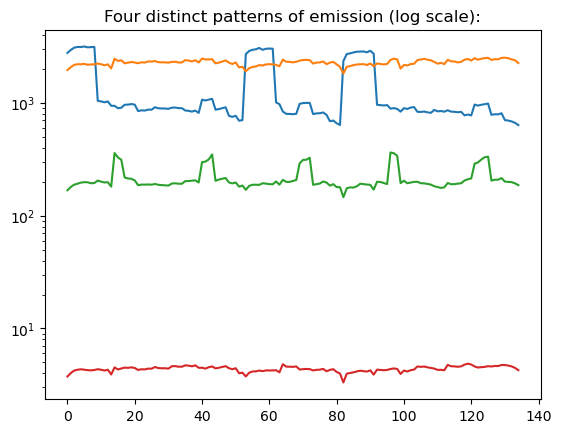

In [186]:

fig, ax = plt.subplots()
for location in four_representatives:
    series = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission']
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns of emission (log scale):')
ax.set_yscale('log')
plt.show()

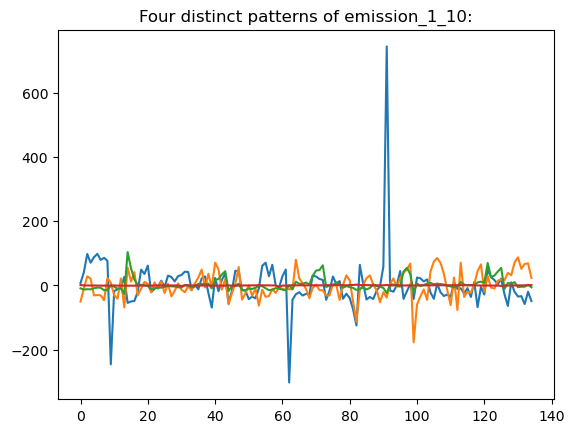

In [187]:
fig, ax = plt.subplots()
for location in four_representatives:
    series = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10']
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns of emission_1_10:')
plt.show()

As you can see, our estimator did a good job removing level, trend and seasonality. Let's try to remove cycles.

## 17. Cycles

Let's explore lags of our time series (the four representatives). We'll use a few functions by Ryan Holbrook.

Location group: ['Special 1']
Categories (4, object): ['High', 'Low', 'Special 1', 'Special 2']


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


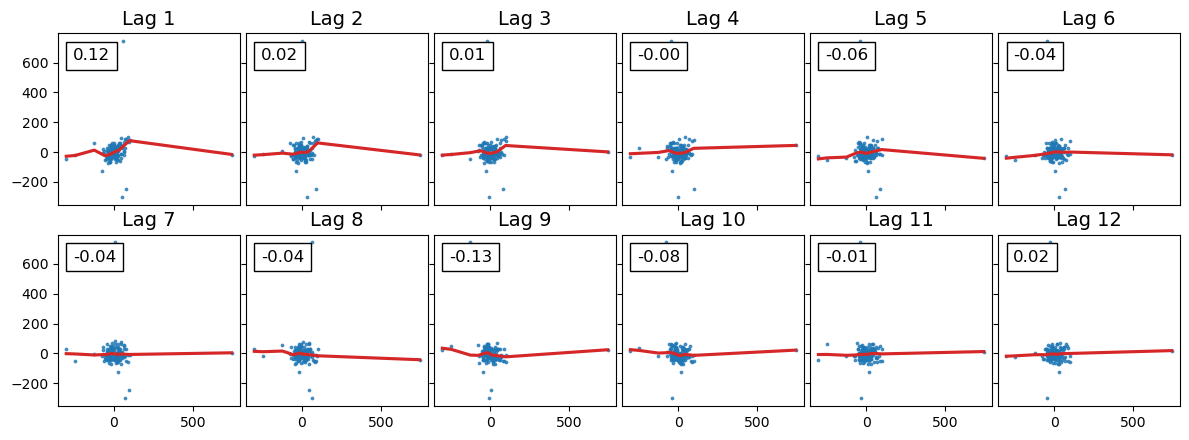

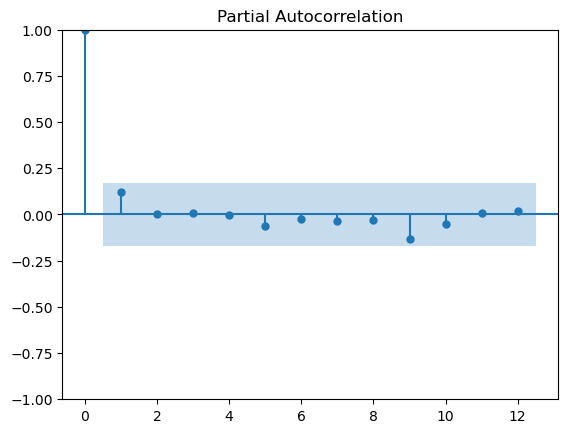

Location group: ['Special 2']
Categories (4, object): ['High', 'Low', 'Special 1', 'Special 2']


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


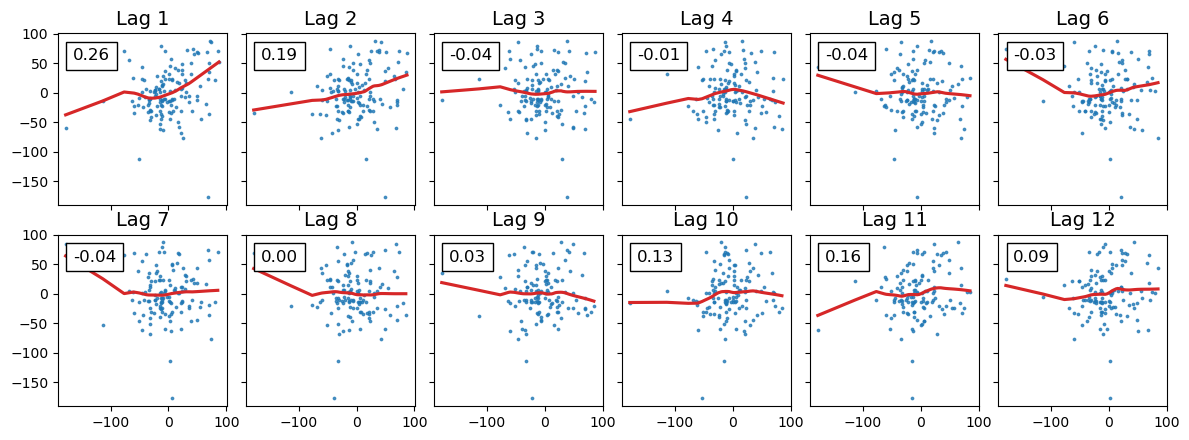

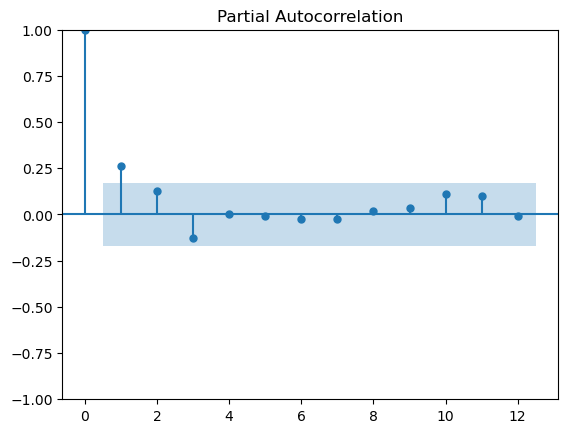

Location group: ['High']
Categories (4, object): ['High', 'Low', 'Special 1', 'Special 2']


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


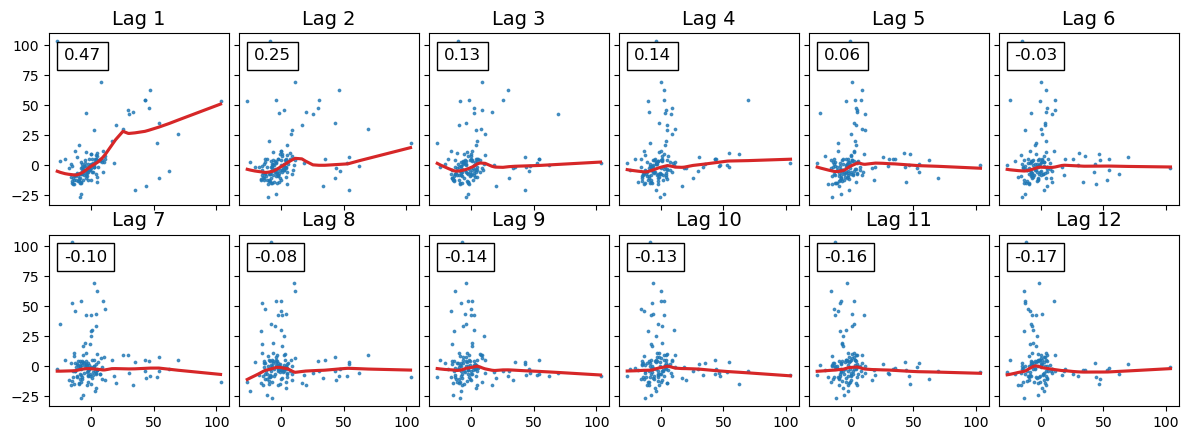

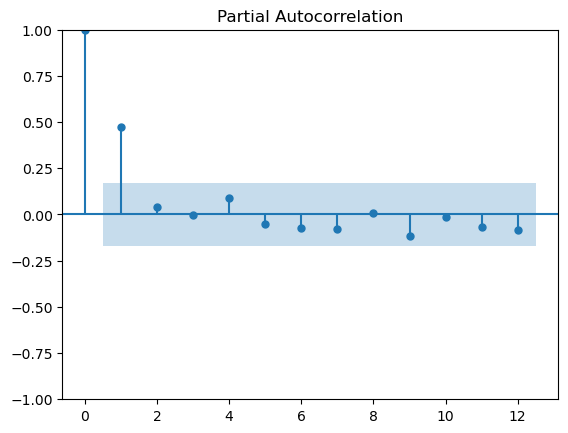

Location group: ['Low']
Categories (4, object): ['High', 'Low', 'Special 1', 'Special 2']


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


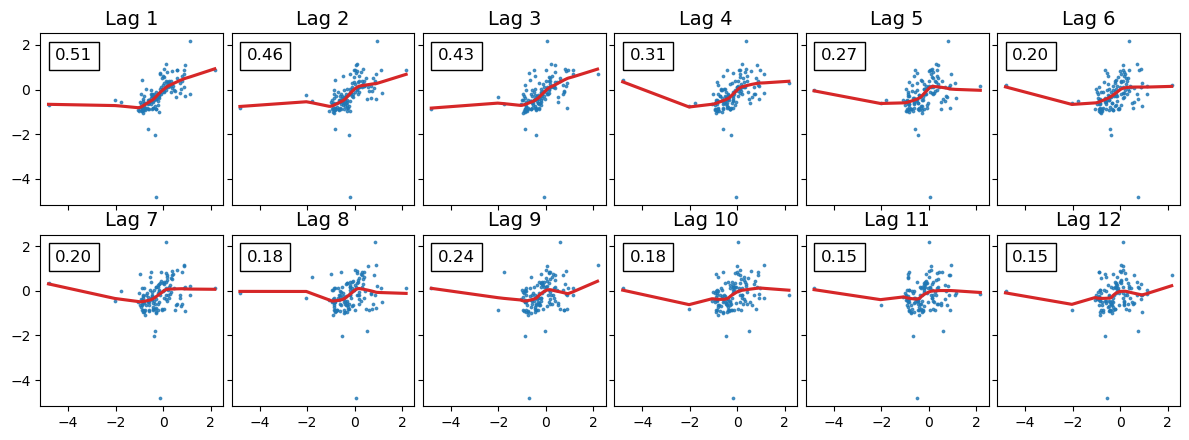

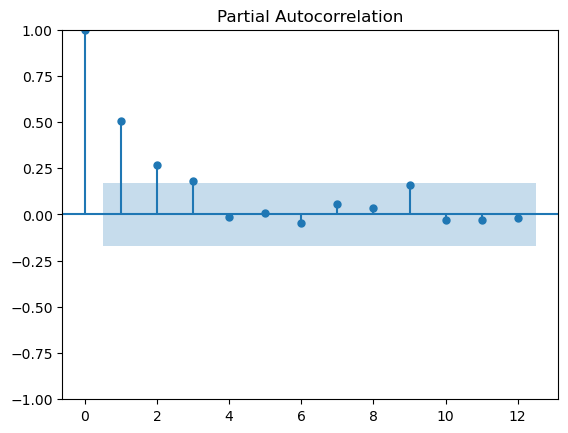

CPU times: total: 7.2 s
Wall time: 7.72 s


In [188]:
%%time

study_number = '17'

from statsmodels.graphics.tsaplots import plot_pacf

def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

LAGS = 6 * 2

for location in four_representatives:
    print('Location group: {}'.format(train_and_cv_unfilled.loc[train_and_cv_unfilled['Location'] == 
                                                         location, 'Location_group'].unique()))
    series = pd.Series(y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10'].values, \
                   index=train_and_cv_unfilled.loc[train_and_cv_unfilled['Location'] == location, 'date'])
    _ = plot_lags(series, lags=LAGS, nrows= round(LAGS / 6))
    _ = plot_pacf(series, lags=LAGS)
    plt.show()




We have no cycles for Special 1, 1-week cycle for Special 2 and High and 1-,2-,3-week cycles for Low.

We'll have to calculate Cycles for each Group separately. We'll do so fitting to training test and then predicting for cv test.

In [189]:
%%time

from sklearn.linear_model import LinearRegression

## Cycles for Special 1 is just 0's

y_train_and_cv.loc[train_and_cv_unfilled['Location_group'] == 'Special 1', 'Cycles'] = 0
y_train.loc[train_unfilled['Location_group'] == 'Special 1', 'Cycles'] = 0
y_cv.loc[cv_unfilled['Location_group'] == 'Special 1', 'Cycles'] = 0
y_test.loc[test_unfilled['Location_group'] == 'Special 1', 'Cycles'] = 0

## Cycles for Special 2 and High

# list of locations
high_locations = train_and_cv_unfilled.loc[(train_and_cv_unfilled['Location_group'] == 'Special 2') |
                                          (train_and_cv_unfilled['Location_group'] == 'High'), 'Location'].unique().tolist()

# For each location
for location in high_locations:
    # Calculate lag_1
    y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10_lag_1'] = \
                y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10'].shift(1)
    
# Fill a mising lag for the first week with a value for the first week
y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10_lag_1'] = \
                        y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10']

    

# Copy to train and cv sets
y_train['emission_1_10_lag_1'] = y_train_and_cv.loc[y_train.index, 'emission_1_10_lag_1']
y_cv['emission_1_10_lag_1'] = y_train_and_cv.loc[y_cv.index , 'emission_1_10_lag_1']


# Instantiate the estimator
model = LinearRegression(fit_intercept=False)

# For each location
for location in high_locations:
    # Save indices
    train_index = train_unfilled['Location'] == location
    cv_index = cv_unfilled['Location'] == location
    
    # Dataframes
    emission_03_lag_1_train = pd.DataFrame(y_train.loc[train_index, 'emission_1_10_lag_1'])
    emission_03_lag_1_cv = pd.DataFrame(y_cv.loc[cv_index, 'emission_1_10_lag_1'])
    
    
    # Fit to the training set
    model.fit(emission_03_lag_1_train, y_train.loc[train_index, 'emission_1_10'])
    
    # Predict for the training and cross-validation sets
    
    train_pred = pd.Series(model.predict(emission_03_lag_1_train), index=y_train.index[train_index])
    y_train.loc[train_index, 'Cycles'] = train_pred
    
    cv_pred = pd.Series(model.predict(emission_03_lag_1_cv), index=y_cv.index[cv_index])
    y_cv.loc[cv_index, 'Cycles'] = cv_pred
    


CPU times: total: 3.67 s
Wall time: 4.27 s


In [190]:
%%time

## Cycles for Low

# list of locations
low_locations = train_and_cv_unfilled.loc[(train_and_cv_unfilled['Location_group'] == 'Low'),
                                          'Location'].unique().tolist()

# For each location
for location in low_locations:
    # Calculate lag_1
    y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10_lag_1'] = \
                y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10'].shift(1)
    # Calculate lag_2
    y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10_lag_2'] = \
                y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10'].shift(2)
    
    
# Fill mising lags for the first weeks with values for the first weeks
y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10_lag_1'] = \
                        y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10']
y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10_lag_2'] = \
                        y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10']
y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 1, 'emission_1_10_lag_2'] = \
                        y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 1, 'emission_1_10']


    

# Copy to train and cv sets
y_train['emission_1_10_lag_1'] = y_train_and_cv.loc[y_train.index, 'emission_1_10_lag_1']
y_cv['emission_1_10_lag_1'] = y_train_and_cv.loc[y_cv.index , 'emission_1_10_lag_1']
y_train['emission_1_10_lag_2'] = y_train_and_cv.loc[y_train.index, 'emission_1_10_lag_2']
y_cv['emission_1_10_lag_2'] = y_train_and_cv.loc[y_cv.index , 'emission_1_10_lag_2']


# Instantiate the estimator
model = LinearRegression(fit_intercept=False)

# For each location
for location in low_locations:
    # Save indices
    train_index = train_unfilled['Location'] == location
    cv_index = cv_unfilled['Location'] == location
    
    # Dataframes
    emission_03_lags_train = pd.DataFrame(y_train.loc[train_index,
                                                      ['emission_1_10_lag_1', 'emission_1_10_lag_2']])
    emission_03_lags_cv = pd.DataFrame(y_cv.loc[cv_index,
                                                      ['emission_1_10_lag_1', 'emission_1_10_lag_2']])
    
    
    # Fit to the training set
    model.fit(emission_03_lags_train, y_train.loc[train_index, 'emission_1_10'])
    
    # Predict for the training and cross-validation sets
    
    train_pred = pd.Series(model.predict(emission_03_lags_train), index=y_train.index[train_index])
    y_train.loc[train_index, 'Cycles'] = train_pred
    
    cv_pred = pd.Series(model.predict(emission_03_lags_cv), index=y_cv.index[cv_index])
    y_cv.loc[cv_index, 'Cycles'] = cv_pred
    


CPU times: total: 9.19 s
Wall time: 9.36 s


Let's look at the results at our 4 chosen Locations:

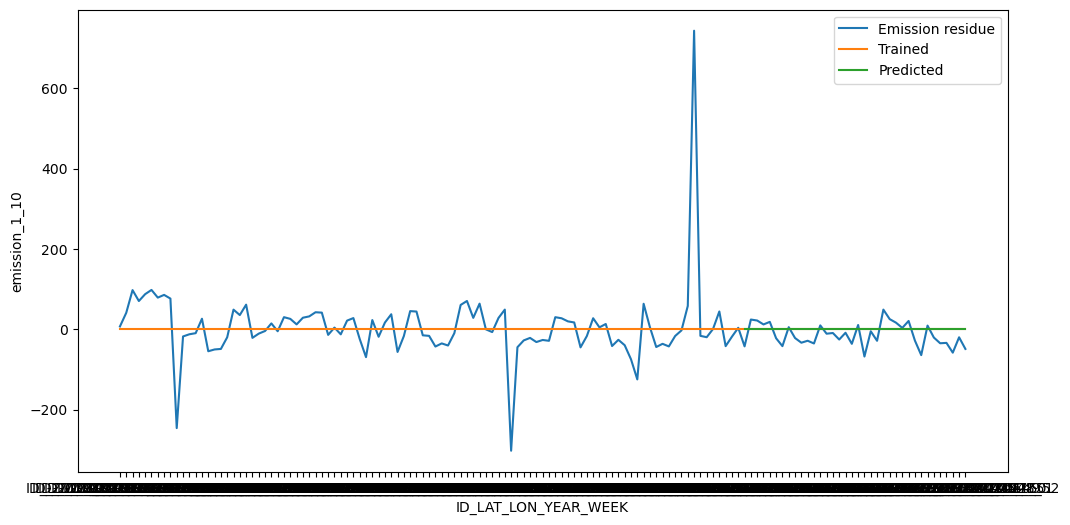

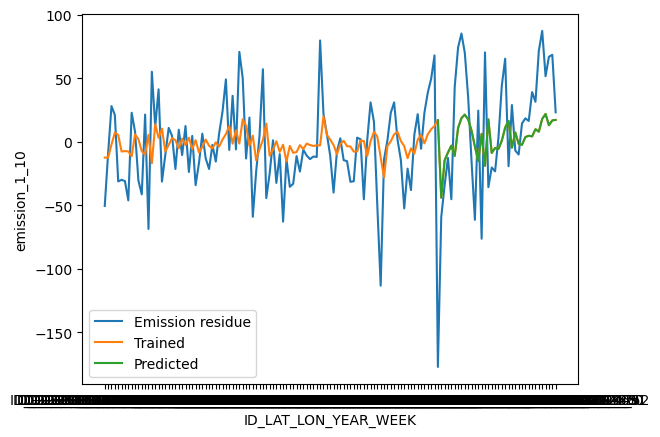

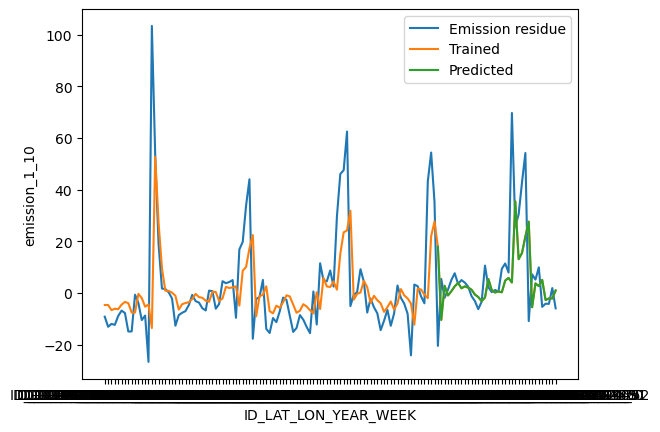

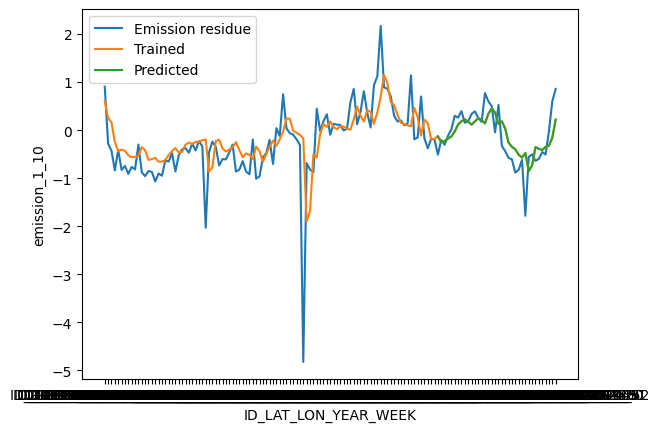

CPU times: total: 2.97 s
Wall time: 3.22 s


In [191]:
%%time

fig, ax = plt.subplots(figsize=(12, 6))
for location in four_representatives:
    sns.lineplot(data = pd.concat([y_train[train_unfilled['Location'] == location],
                                   y_cv[cv_unfilled['Location'] == location]])['emission_1_10'],
                             label='Emission residue')
    sns.lineplot(data = pd.concat([y_train[train_unfilled['Location'] == location],
                                   y_cv[cv_unfilled['Location'] == location]])["Cycles"],
                                   label='Trained')
    sns.lineplot(data = y_cv[cv_unfilled['Location'] == location]['Cycles'], label='Predicted')
    plt.show() 

plt.show()

Let's calculate Scores.

In [192]:
# Add back subtractions:
pred_train = y_train['Cycles'] + y_train['pred_1_10']
pred_cv = y_cv['Cycles'] + y_cv['pred_1_10']

# Calculate scores
score_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
score_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)


# Write down the scores
scores_df.loc[int(study_number), 'Comment'] = '11 + Cycles'
scores_df.loc[int(study_number), 'Train RMSE'] = score_train
scores_df.loc[int(study_number), 'Cross-val RMSE'] = score_cv

scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227
12                + Second layer    7.144558        8.037931   34.13290
13           11 + PC by location   41.398523       39.640607   62.64639
14           12 + PC by location    7.856535        8.286951   34.05845
15                       11 + PC   41.465993       39.622052   63.91384
16                       12 + PC    7.834309        8.380621   33.94004
17                   11 + Cycles    7.326768        6.510707        NaN

This Cross-val score, however, is not very indicative. Note, we used 'emission_1_10' in our predictions of Cycles, which we simply can't do for the test set, we don't have emission there. And if we had, still, our prediction couldn't be extrapolated into the future. 

Therefore, in order to get a real Cross-val score, we need to forecast Cycles for cv, using only the data from training set.

## 18. Cycles forecast

We'll apply the Direct strategy to create the forecast. For the sake of runtime, we'll do in a separate file: ['functions/cycles_forecast.py'] (functions/cycles_forecast.py).

In [193]:
%%time

study_number = '18'

train_and_cv_unfilled.to_csv('new_datasets/train_and_cv_unfilled_1_{}.csv'.format(study_number))
train_unfilled.to_csv('new_datasets/train_unfilled_1_{}.csv'.format(study_number))
cv_unfilled.to_csv('new_datasets/cv_unfilled_1_{}.csv'.format(study_number))
test_unfilled.to_csv('new_datasets/test_unfilled_1_{}.csv'.format(study_number))

y_train_and_cv.to_csv('new_datasets/y_train_and_cv_1_{}.csv'.format(study_number))
y_train.to_csv('new_datasets/y_train_1_{}.csv'.format(study_number))
y_cv.to_csv('new_datasets/y_cv_1_{}.csv'.format(study_number))
y_test.to_csv('new_datasets/y_test_1_{}.csv'.format(study_number))


CPU times: total: 12.8 s
Wall time: 13.7 s


In [194]:
y_train_and_cv = pd.read_csv('new_datasets/y_train_and_cv_1_18_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_train = pd.read_csv('new_datasets/y_train_1_18_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_cv = pd.read_csv('new_datasets/y_cv_1_18_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_test = pd.read_csv('new_datasets/y_test_1_18_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')

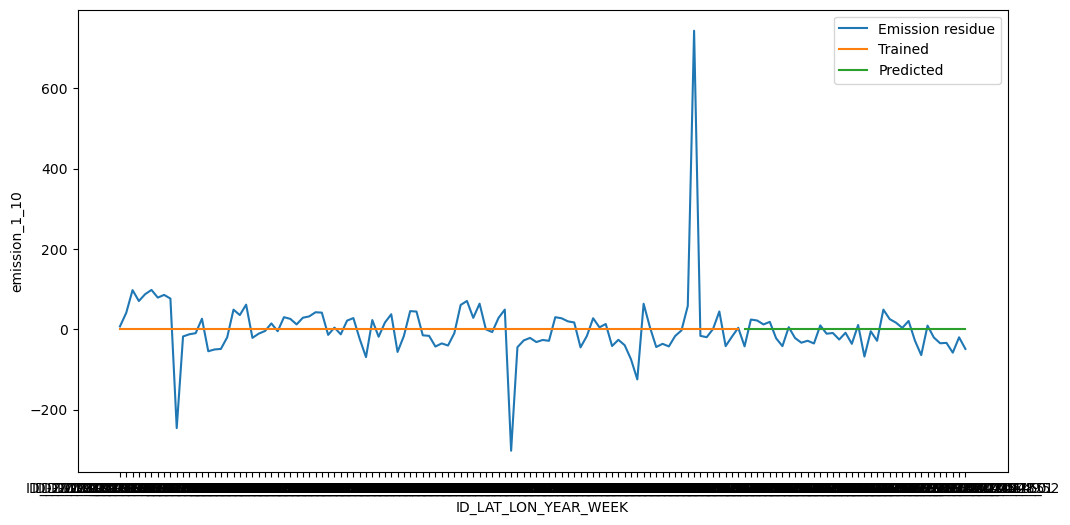

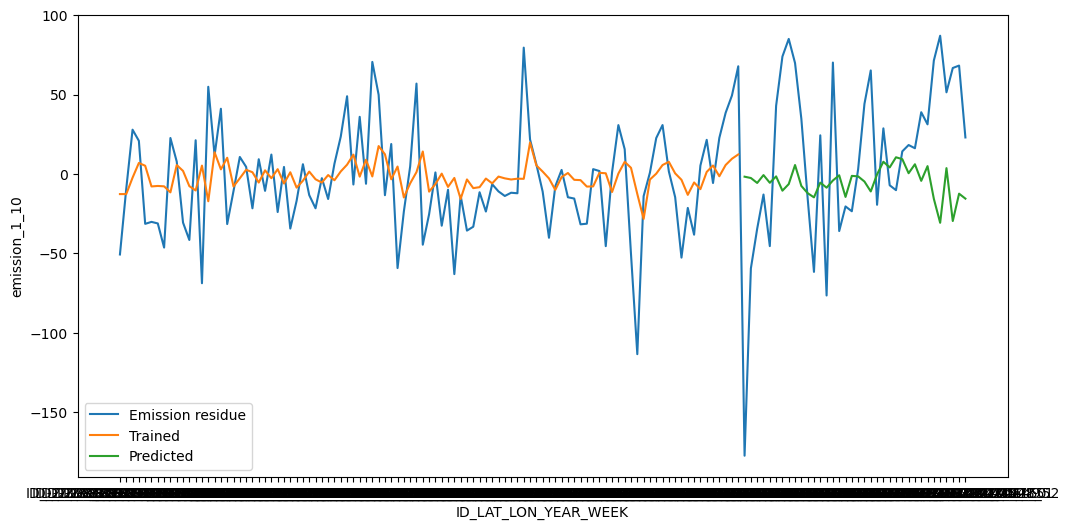

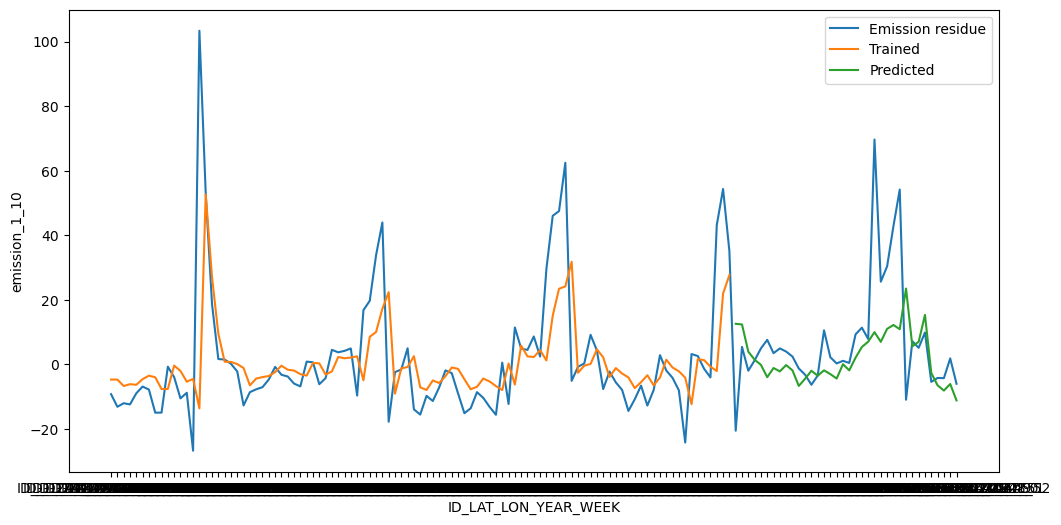

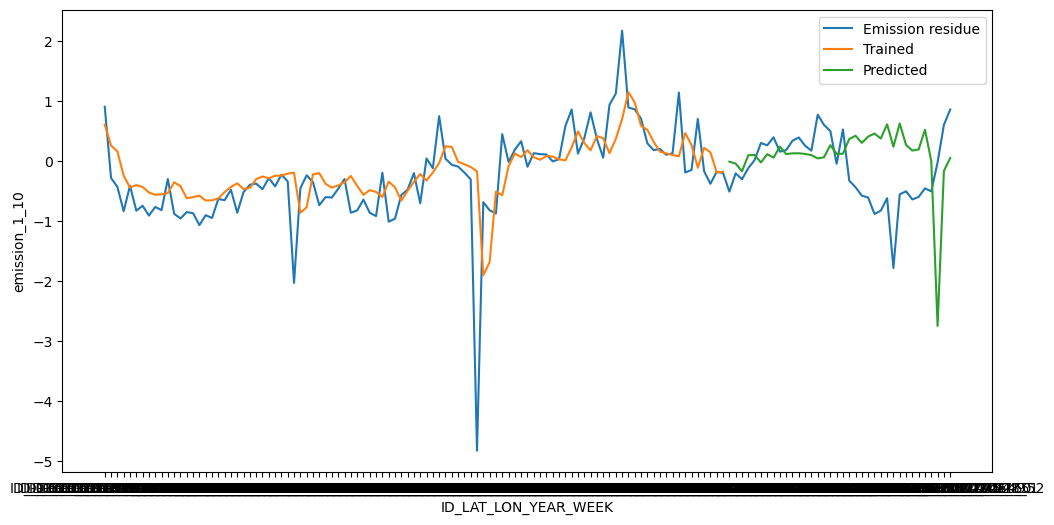

CPU times: total: 3.25 s
Wall time: 3.71 s


In [195]:
%%time

for location in four_representatives:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data = pd.concat([y_train[train_unfilled['Location'] == location],
                                   y_cv[cv_unfilled['Location'] == location]])['emission_1_10'],
                             label='Emission residue')
    sns.lineplot(data =y_train[train_unfilled['Location'] == location]["Cycles"],
                                   label='Trained')
    sns.lineplot(data = y_cv[cv_unfilled['Location'] == location]['Cycles_forecast'], label='Predicted')
    plt.show() 

In [196]:
# Add back subtractions:
pred_train = y_train['Cycles'] + y_train['pred_1_10']
pred_cv = y_cv['Cycles_forecast'] + y_cv['pred_1_10']
pred_test = y_test['Cycles_forecast'] + y_test['pred_1_10']

# Calculate scores
score_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
score_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)

# Write down the scores
scores_df.loc[int(study_number), 'Comment'] = '11 + Cycles Forecast'
scores_df.loc[int(study_number), 'Train RMSE'] = score_train
scores_df.loc[int(study_number), 'Cross-val RMSE'] = score_cv

# Create a submission file
submission = pd.DataFrame(pred_test)
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

Now let's use train_and_cv to forecast for test:

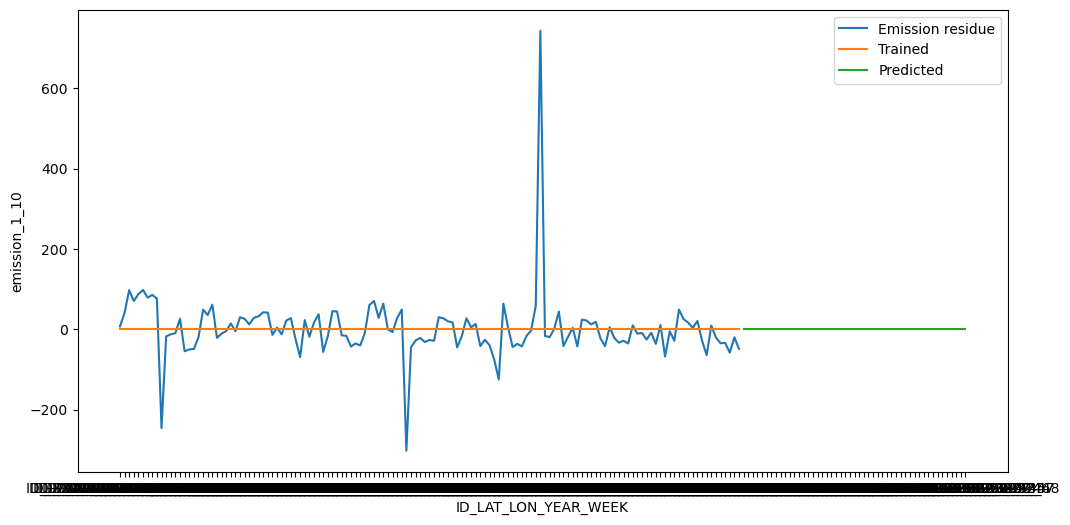

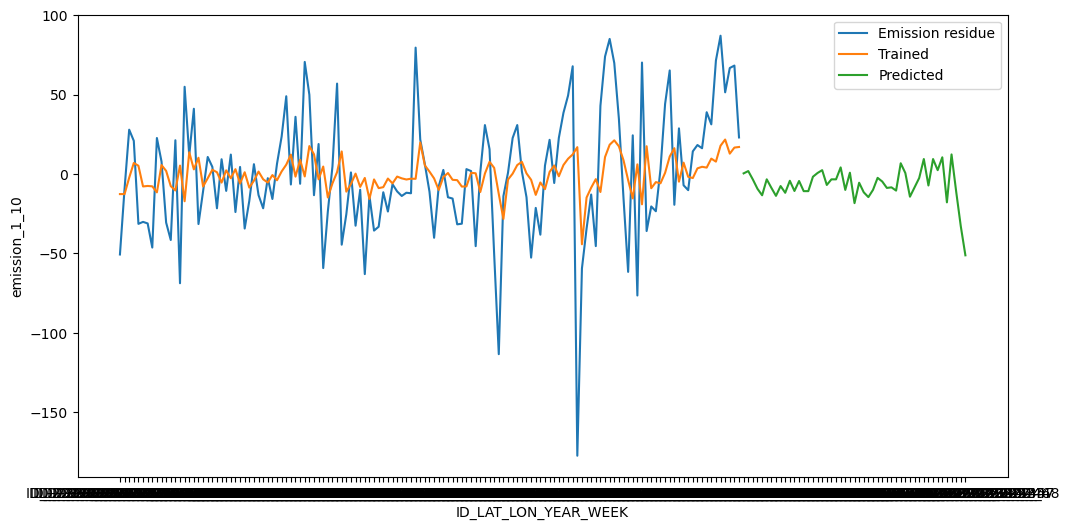

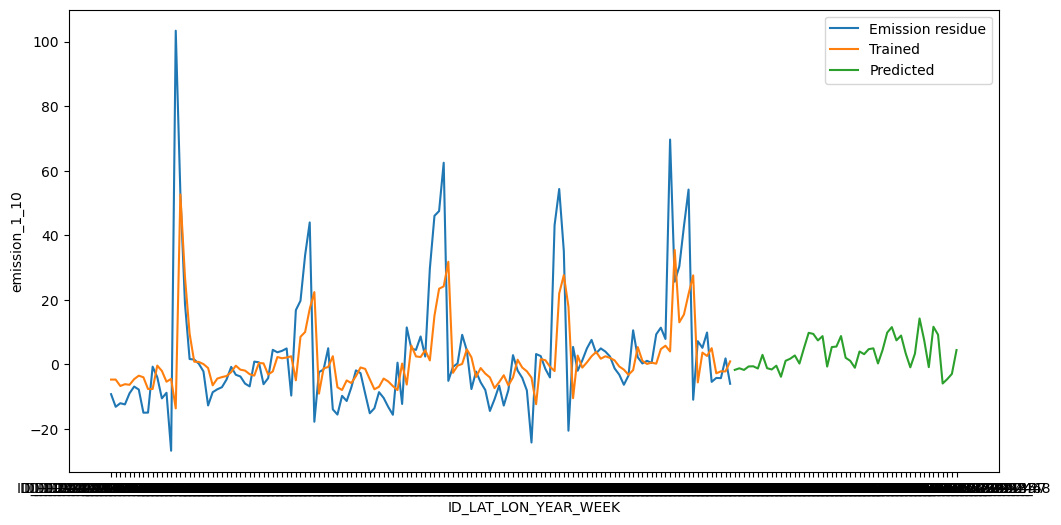

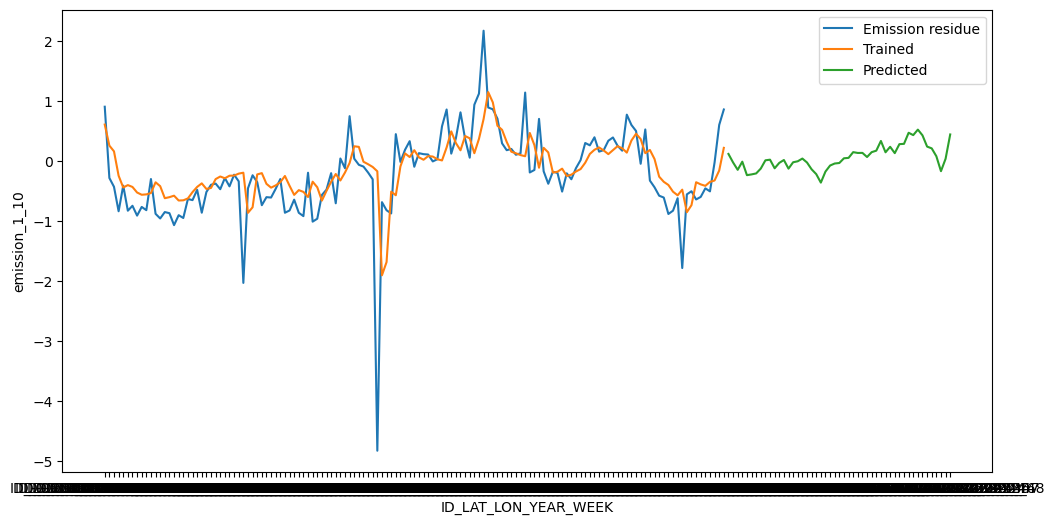

CPU times: total: 4 s
Wall time: 4.46 s


In [197]:
%%time


for location in four_representatives:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data = pd.concat([y_train[train_unfilled['Location'] == location],
                                   y_cv[cv_unfilled['Location'] == location],
                                  y_test[test_unfilled['Location'] == location]])['emission_1_10'],
                             label='Emission residue')
    sns.lineplot(data = pd.concat([y_train[train_unfilled['Location'] == location],
                                   y_cv[cv_unfilled['Location'] == location]])['Cycles'],
                             label='Trained')
    sns.lineplot(data = y_test[test_unfilled['Location'] == location]['Cycles_forecast'], label='Predicted')
    plt.show() 

In [198]:
scores_df.loc[int(study_number), 'Test RMSE'] = 33.78178
scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227
12                + Second layer    7.144558        8.037931   34.13290
13           11 + PC by location   41.398523       39.640607   62.64639
14           12 + PC by location    7.856535        8.286951   34.05845
15                       11 + PC   41.465993       39.622052   63.91384
16                       12 + PC    7.834309        8.380621   33.94004
17                   11 + Cycles    7.326768        6.510707        NaN
18          11 + Cycles Forecast    7.326768        8.533668   33.78178

## 19. Cycles DirRec forecast

Next, we'll try the DirRec strategy to forecast.

In [199]:
study_number = '19'

y_train_and_cv = pd.read_csv('new_datasets/y_train_and_cv_1_19_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_train = pd.read_csv('new_datasets/y_train_1_19_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_cv = pd.read_csv('new_datasets/y_cv_1_19_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_test = pd.read_csv('new_datasets/y_test_1_19_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')

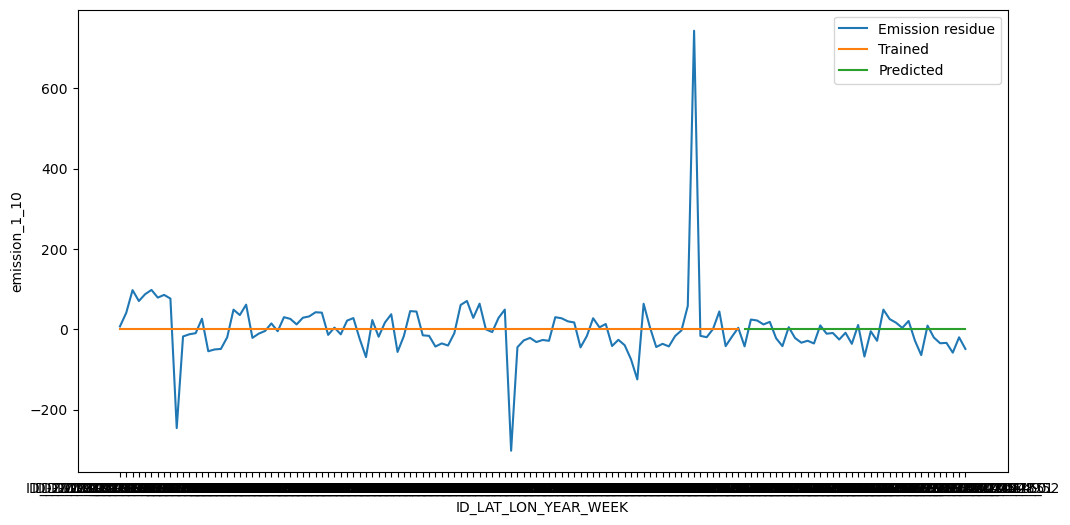

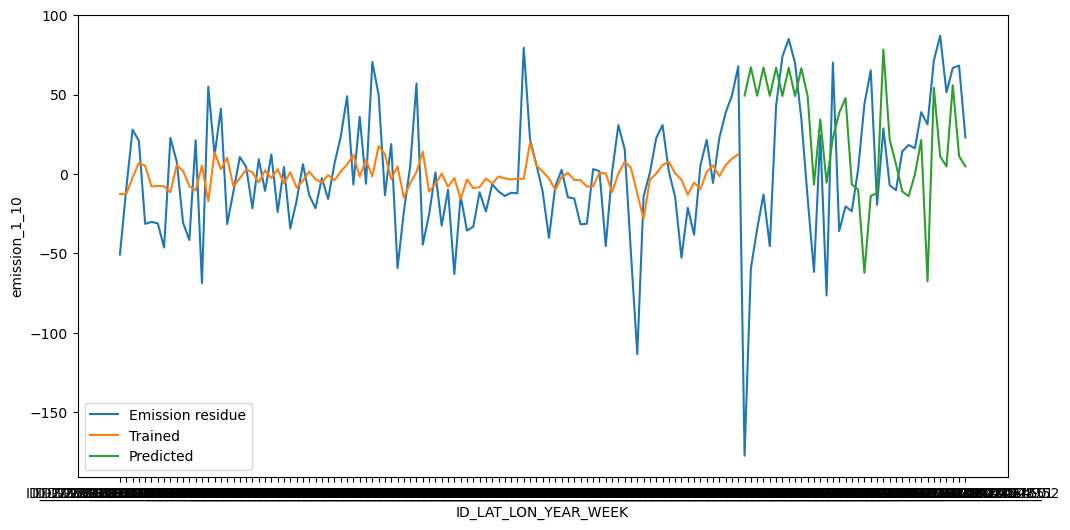

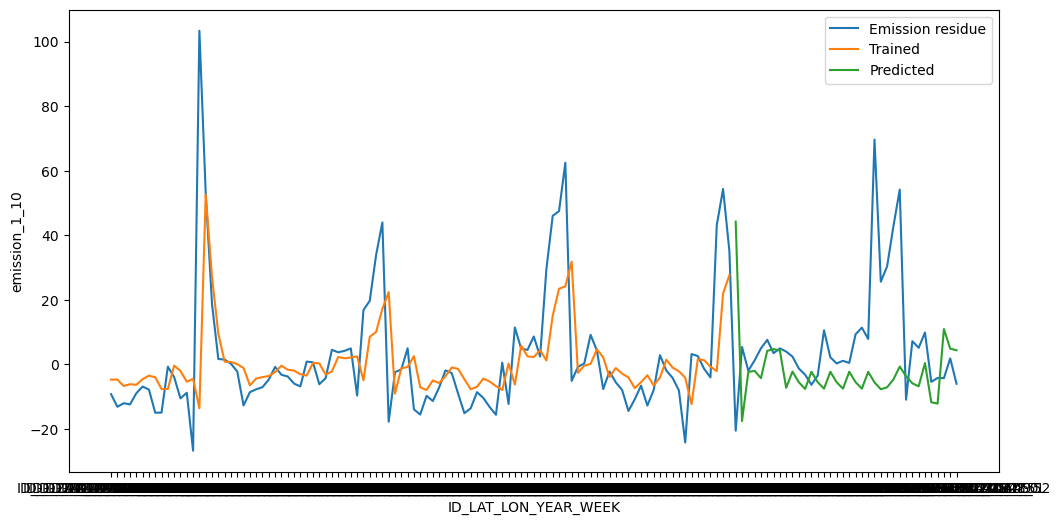

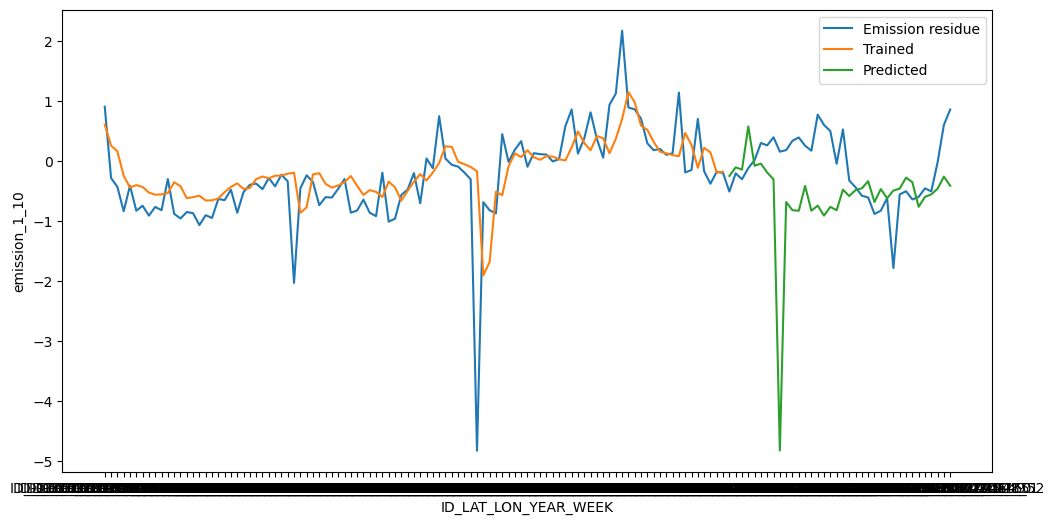

CPU times: total: 3.2 s
Wall time: 3.7 s


In [200]:
%%time

for location in four_representatives:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data = pd.concat([y_train[train_unfilled['Location'] == location],
                                   y_cv[cv_unfilled['Location'] == location]])['emission_1_10'],
                             label='Emission residue')
    sns.lineplot(data =y_train[train_unfilled['Location'] == location]["Cycles"],
                                   label='Trained')
    sns.lineplot(data = y_cv[cv_unfilled['Location'] == location]['Cycles_forecast'], label='Predicted')
    plt.show() 

In [201]:
# Add back subtractions:
pred_train = y_train['Cycles'] + y_train['pred_1_10']
pred_cv = y_cv['Cycles_forecast'] + y_cv['pred_1_10']
#pred_test = y_test['Cycles_forecast'] + y_test['pred_1_10']

# Calculate scores
score_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
score_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)

# Write down the scores
scores_df.loc[int(study_number), 'Comment'] = '11 + Cycles Forecast DirRec'
scores_df.loc[int(study_number), 'Train RMSE'] = score_train
scores_df.loc[int(study_number), 'Cross-val RMSE'] = score_cv

# Create a submission file
# submission = pd.DataFrame(pred_test)
# submission.columns = ['emission']
# submission.to_csv('submissions/submission_' + study_number + '.csv')

scores_df

Comment  Train RMSE  Cross-val RMSE  Test RMSE
0                    Just median  148.806038             NaN  169.19374
1   LightGBM on unprocessed data   15.784784      148.279326   47.78191
2                       No covid   14.556626      152.802403   45.00252
3                    + WeekCount   14.413518      153.047134   44.98007
4               2 + Location_enc    6.537063       63.507568   34.14359
5                  + week_no_enc    5.526572       63.508203   33.18900
6         4 + Location_group_enc    6.246773       62.532524   34.20915
7                       + tuning   17.956427       52.431363   45.61363
8         6 + Location_cluster_2    6.251627       62.488075        NaN
9            + Filled based on 2    6.225799       48.515175   42.76071
10       8 + Filled based on all    6.253388       62.399014   33.80227
11        + new cross-val method    8.814735       22.231199   33.80227
12                + Second layer    7.144558        8.037931   34.13290
13           11 + PC by location   41.398523       39.640607   62.64639
14           12 + PC by location    7.856535        8.286951   34.05845
15                       11 + PC   41.465993       39.622052   63.91384
16                       12 + PC    7.834309        8.380621   33.94004
17                   11 + Cycles    7.326768        6.510707        NaN
18          11 + Cycles Forecast    7.326768        8.533668   33.78178
19   11 + Cycles Forecast DirRec    7.326768       12.681430        NaN

The Direct strategy worked better, than DirRec. 

In [202]:
y_train_and_cv = pd.read_csv('new_datasets/y_train_and_cv_1_18_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_train = pd.read_csv('new_datasets/y_train_1_18_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_cv = pd.read_csv('new_datasets/y_cv_1_18_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')
y_test = pd.read_csv('new_datasets/y_test_1_18_result.csv',
                           index_col='ID_LAT_LON_YEAR_WEEK')

In [203]:
train_and_cv_unfilled.to_csv('new_datasets/train_and_cv_unfilled_1_final.csv')
train_unfilled.to_csv('new_datasets/train_unfilled_1_final.csv')
cv_unfilled.to_csv('new_datasets/cv_unfilled_1_final.csv')
test_unfilled.to_csv('new_datasets/test_unfilled_1_final.csv')

y_train_and_cv.to_csv('new_datasets/y_train_and_cv_1_final.csv')
y_train.to_csv('new_datasets/y_train_1_final.csv')
y_cv.to_csv('new_datasets/y_cv_1_final.csv')
y_test.to_csv('new_datasets/y_test_1_final.csv')

X_train_and_cv.to_csv('new_datasets/X_train_and_cv_1_{}.csv')
X_train.to_csv('new_datasets/X_train_1_{}.csv')
X_cv.to_csv('new_datasets/X_cv_1_{}.csv')
X_test.to_csv('new_datasets/X_test_1_{}.csv')

pd.DataFrame(four_representatives).to_csv('new_datasets/four_representatives.csv')


In [204]:
train_unfilled.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [205]:
train_and_cv_unfilled.head()

latitude  longitude  year  week_no  \
ID_LAT_LON_YEAR_WEEK                                           
ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

                          SulphurDioxide_SO2_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                 
ID_-0.510_29.290_2019_00                                 -0.000108   
ID_-0.510_29.290_2019_01                                  0.000021   
ID_-0.510_29.290_2019_02                                  0.000514   
ID_-0.510_29.290_2019_03                                       NaN   
ID_-0.510_29.290_2019_04                                 -0.000079   

                          SulphurDioxide_SO2_column_number_density_amf  \
ID_LAT_LON_YEAR_WEEK                                                     
ID_-0.510_29.290_2019_00                                      0.603019   
ID_-0.510_29.290_2019_01                                      0.728214   
ID_-0.510_29.290_2019_02                                      0.748199   
ID_-0.510_29.290_2019_03                                           NaN   
ID_-0.510_29.290_2019_04                                      0.676296   

                          SulphurDioxide_SO2_slant_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                       
ID_-0.510_29.290_2019_00                                       -0.000065   
ID_-0.510_29.290_2019_01                                        0.000014   
ID_-0.510_29.290_2019_02                                        0.000385   
ID_-0.510_29.290_2019_03                                             NaN   
ID_-0.510_29.290_2019_04                                       -0.000048   

                          SulphurDioxide_cloud_fraction  \
ID_LAT_LON_YEAR_WEEK                                      
ID_-0.510_29.290_2019_00                       0.255668   
ID_-0.510_29.290_2019_01                       0.130988   
ID_-0.510_29.290_2019_02                       0.110018   
ID_-0.510_29.290_2019_03                            NaN   
ID_-0.510_29.290_2019_04                       0.121164   

                          SulphurDioxide_sensor_azimuth_angle  \
ID_LAT_LON_YEAR_WEEK                                            
ID_-0.510_29.290_2019_00                           -98.593887   
ID_-0.510_29.290_2019_01                            16.592861   
ID_-0.510_29.290_2019_02                            72.795837   
ID_-0.510_29.290_2019_03                                  NaN   
ID_-0.510_29.290_2019_04                             4.121269   

                          SulphurDioxide_sensor_zenith_angle  ...  emission  \
ID_LAT_LON_YEAR_WEEK                                          ...             
ID_-0.510_29.290_2019_00                           50.843559  ...  3.750994   
ID_-0.510_29.290_2019_01                           39.137194  ...  4.025176   
ID_-0.510_29.290_2019_02                           52.868816  ...  4.231381   
ID_-0.510_29.290_2019_03                                 NaN  ...  4.305286   
ID_-0.510_29.290_2019_04                           35.515587  ...  4.347317   

                               date  WeekCount    Location  Location_group  \
ID_LAT_LON_YEAR_WEEK                                                         
ID_-0.510_29.290_2019_00 2019-01-01          0  -0.5129.29             Low   
ID_-0.510_29.290_2019_01 2019-01-08          1  -0.5129.29             Low   
ID_-0.510_29.290_2019_02 2019-01-15          2  -0.5129.29             Low   
ID_-0.510_29.290_2019_03 2019-01-22          3  -0.5129.29             Low   
ID_-0.510_29.290_2019_04 2019-01-29          4  -0.5129.29             Low   

                          Location_enc  week_no_category  week_